In [1]:
# save files
fullproc_r = '/Users/jnaiman/LMM_Figure_Parsing/resources/'

# get title and x/y labels from most frequent words
data_dir = '/Users/jnaiman/LMM_Figure_Parsing/resources/data/'

# save
#fake_figs_dir = '/Users/jnaiman/Downloads/tmp/fake_figs/'
fake_figs_dir = '/Users/jnaiman/Dropbox/JCDL2024/paper_submission/data/'

# only used to re-do inlines
dirs_latex = ['arxiv/9901', 'arxiv_new/2301', 'arxiv_new/2302']
base_dir_arxiv = '/Users/jnaiman/Dropbox/wwt_image_extraction/'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2 as cv
import pickle
import pandas as pd
#import string
from glob import glob
from mpl_toolkits.axes_grid1 import make_axes_locatable
from PIL import ImageColor
import json

#import spacy

# this is hacktacular from: https://github.com/ReadingTimeMachine/TexSoup
# and needs to be updated
# tex_lib = '/Users/jnaiman/TexSoup/'
# from sys import path
# path.append(tex_lib)
# import TexSoup
# from TexSoup import preprocessing, postprocess

#from nltk.corpus import stopwords
import time

# from matplotlib import font_manager
# plt.rcParams['text.usetex'] = True
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath} \usepackage{amssymb}' #for \text command

#nlp = spacy.load("en_core_web_sm")

# written libs
from importlib import reload # debug
import synthetic_fig_utils # debug
reload(synthetic_fig_utils) # debug
from synthetic_fig_utils import subset_by_percent, \
 get_nrows_and_ncols, normalize_params_prob, get_ticks, get_titles_or_labels, \
 get_font_info
 #get_data, make_plot
#get_line_styles, \

import plot_parameters


# import distribution_utils
# reload(distribution_utils)
# from distribution_utils import get_random_data, get_random, \
#    get_linear, get_linear_data, get_data

import plot_utils
reload(plot_utils)
from plot_utils import get_contour_plot, get_histogram_plot, \
   get_line_plot, get_scatter_plot, make_plot#, get_line_plot

import pixel_location_utils
reload(pixel_location_utils)
from pixel_location_utils import get_errorbar_pixels, get_data_pixel_locations

import text_utils
reload(text_utils)
from text_utils import get_popular_nouns, get_inline_math

# create a bunch of fake figures
reload(synthetic_fig_utils)
from synthetic_fig_utils import normalize_params_prob
reload(plot_parameters)
from plot_parameters import plot_types_params, panel_params, \
  title_params, xlabel_params, \
  ylabel_params, aspect_fig_params, dpi_params, tight_layout_params, \
  fontsizes, base

import data_utils
reload(data_utils)
from data_utils import get_data, NumpyEncoder

use_uniques = True # use unique inlines
verbose = True

In [4]:
#print('... for the plot in the', plot_index_to_words([0,1]), 'panel ...')

In [5]:
# get fonts -- see "cnn_create_synthetic_ticks" in FullProcess
dfont = pd.read_csv(fullproc_r + 'fonts.csv')
font_names = dfont['font name'].values

# for plot styles
plot_styles = plt.style.available

In [6]:
# get words
popular_nouns = get_popular_nouns(data_dir)

16253 343492
shape of output= (5097, 5)
shape of output= (36332, 5)


Get inline math:

In [7]:
inlines = get_inline_math(base_dir_arxiv, dirs_latex, fullproc_r,
                          recreate_inlines=False,
                         use_uniques=use_uniques)

number of inlines =  33201


## Update plotting params

In [8]:
plot_params = plot_types_params.copy()

### Line plots, Linear distributions

In [9]:
linestyles = ['-', '--', ':'] # only use a subset of the linestyles

plot_params_line = {'line':plot_params['line']}

plot_params_line['line']['npoints'] = {'min':10, 'max':100}
plot_params_line['line']['nlines'] = {'min':1, 'max':10}

# just linear
plot_params_line['line']['distribution']['random']['prob'] = 0
plot_params_line['line']['distribution']['gmm']['prob'] = 0
plot_params_line['line']['distribution']['linear']['prob'] = 1

# noise
plot_params_line['line']['distribution']['linear']['noise'] = (0.25, 0.25)

plot_params_line, panel_params, \
  title_params, xlabel_params, \
  ylabel_params = normalize_params_prob(plot_params_line.copy(), panel_params, 
                                        title_params, xlabel_params, 
                                        ylabel_params)

plot_params_line

title_params capatilize did not add to 1! total = 1.2999999999999998
renormalizing...
now:  {'none': 0.07692307692307694, 'first': 0.3846153846153847, 'all': 0.5384615384615385}
xlabel_params capatilize did not add to 1! total = 1.2999999999999998
renormalizing...
now:  {'none': 0.07692307692307694, 'first': 0.3846153846153847, 'all': 0.5384615384615385}
ylabel_params capatilize did not add to 1! total = 1.2999999999999998
renormalizing...
now:  {'none': 0.07692307692307694, 'first': 0.3846153846153847, 'all': 0.5384615384615385}


{'line': {'prob': 1,
  'npoints': {'min': 10, 'max': 100},
  'line thick': {'min': 1, 'max': 5},
  'nlines': {'min': 1, 'max': 10},
  'xmin': -10000,
  'xmax': 10000,
  'ymin': -10000,
  'ymax': 10000,
  'prob same x': 0.1,
  'markers': {'prob': 0.5, 'size': {'min': 1, 'max': 20}},
  'error bars': {'elinewidth': {'min': 1, 'max': 5},
   'x': {'prob': 0.25, 'size': {'min': 0.01, 'max': 0.1}},
   'y': {'prob': 0.25, 'size': {'min': 0.01, 'max': 0.1}}},
  'distribution': {'random': {'prob': 0},
   'linear': {'prob': 1,
    'intersect': (-100, 100),
    'slope': (-5, 5),
    'noise': (0.25, 0.25)},
   'gmm': {'prob': 0,
    'histogram as line': {'prob': 0.25, 'factor': 1000},
    'nclusters': {'min': 1, 'max': 20},
    'nsamples': {'min': 10, 'max': 500},
    'cluster std': {'min': -2, 'max': 0.5},
    'noise': {'min': 0.05, 'max': 0.25}}}}}

In [10]:
#xlabel_params

In [11]:
#plot_styles

In [12]:
#plot_types_params
plot_types = []
for p,v in plot_types_params.items():
    plot_types.append(p)
plot_types

['line', 'histogram', 'scatter', 'contour']

## Generate "toy" data to test QA pairs


In [27]:
plot_params_here = plot_params_line.copy()

ifigure = 0

datas_all = {} # for multiples
plt.close('all')

if True:
    ######### pick things ########
    # figure
    color_map = 'gray' # hack#np.random.choice(plt.colormaps())
    #plt.set_cmap(color_map)
    
    npanels, panel_style, nrows, ncols = get_nrows_and_ncols(panel_params)
    ####npanels, panel_style,nrows,ncols = 1, 'horizontal', 1,1 # HACK
    plot_style = np.random.choice(plot_styles)
    
    aspect_fig = np.random.uniform(low=aspect_fig_params['min'], 
                                   high=aspect_fig_params['max'])
    # rows and cols 
    aspect_fig *= nrows/ncols
    dpi = int(np.random.uniform(low=dpi_params['min'], high=dpi_params['max']))
    # tight layout or not
    print('panel style:', panel_style, 'nrows,ncols=', (nrows,ncols), 
          'aspect=', aspect_fig, 'dpi=', dpi)
    
    tight_layout = True


    # get all font stuffs
    title_fontsize, xlabel_fontsize, ylabel_fontsize, \
       xlabel_ticks_fontsize, ylabel_ticks_fontsize, \
                           csfont = get_font_info(fontsizes, font_names)
    #print("ALL IS WELL HERE 1")

    # plot types?
    success = False
    start_time = time.time()
    while not success:
        #with plt.style.context(plot_style):
        if True:
            plt.style.use(plot_style)
            plt.set_cmap(color_map) 
            #plt.rcParams['image.cmap'] = 'gray' #color_map
            if tight_layout:
                fig,axes = plt.subplots(nrows,ncols,figsize=(base*nrows, base*aspect_fig*ncols), 
                                        dpi=dpi,layout='tight')
            else:
                fig,axes = plt.subplots(nrows,ncols,figsize=(base*nrows, base*aspect_fig*ncols), 
                                        dpi=dpi)
                
            if npanels == 1:
                axes = [axes]
                plot_inds = [(0,0)] # i,j
            else: # flatten, for now
                # create inds
                if len(axes.shape) > 1: # 2d
                    ashape = np.array(axes.shape).copy()
                else:
                    ashape = [nrows, ncols]

                plot_inds = np.empty(shape=(ashape[0], ashape[1],2), dtype=int)
                for i in range(ashape[0]):
                    for j in range(ashape[1]):
                        plot_inds[i,j][0] = i
                        plot_inds[i,j][1] = j
                plot_inds = plot_inds.reshape((ashape[0]*ashape[1],-1))
                axes = axes.flatten()
            

            #**HERE** have to save index
                    
            ######### Generate plot data #########
            #print('here 1')
            
            choices = []; probs = []
            for k,v in plot_params_here.items():
                choices.append(k)
                probs.append(v['prob'])
        
            data_for_plots = []
            plot_types = []
            data_from_plots = []
            titles = []; xlabels = []; ylabels = []; cbars = []
            end_time = time.time()
            #try:
            if True:
                for iplot, ax in enumerate(axes):
                    start_time = time.time()
                    plot_type = np.random.choice(choices, p=probs)
                    print('PLOT TYPE:', plot_type)
                    # get distribution type
                    dist_params = plot_params_here[plot_type]['distribution'] 
                    choices_d = []; probs_d = []
                    for k,v in dist_params.items():
                        choices_d.append(k)
                        probs_d.append(v['prob'])

                    distribution_type = np.random.choice(choices_d, p=probs_d)
                    print('  Distribution Type:', distribution_type)
                    
                    #print('here 2')
                    data_for_plot = get_data(plot_params_here[plot_type],
                                    plot_type=plot_type,
                                            distribution=distribution_type)
                    end_time = time.time()
                
                    ######### PLOT ############
                    start_time = time.time()
                    #print('here 3')
                    data_from_plot, ax = make_plot(plot_params_here[plot_type], data_for_plot, 
                                         ax, plot_type=plot_type, linestyles=linestyles)#, plot_style=plot_style)
                    #import sys; sys.exit()
                    end_time = time.time()
                    #print('here 4')
    
                    # set ticksizes
                    ax.tick_params(axis='x', which='major', labelsize=xlabel_ticks_fontsize, labelfontfamily=csfont['fontname'])
                    ax.tick_params(axis='y', which='major', labelsize=ylabel_ticks_fontsize, labelfontfamily=csfont['fontname'])
    
                    start_time = time.time()
                    p = np.random.uniform(0,1)
                    if p < title_params['prob']:
                        title_words = get_titles_or_labels(popular_nouns, title_params['capitalize'],
                                                 title_params['equation'], inlines,
                                                 nwords=np.random.randint(low=title_params['n words']['min'],
                                                                          high=title_params['n words']['max']+1))
                        title = ax.set_title(title_words, fontsize = title_fontsize, **csfont)
                    else:
                        title = ''
                        
                    xlabel_words = get_titles_or_labels(popular_nouns, xlabel_params['capitalize'],
                                                 xlabel_params['equation'], inlines,
                                                 nwords=np.random.randint(low=xlabel_params['n words']['min'],
                                                                          high=xlabel_params['n words']['max']+1))
                    xlabel = ax.set_xlabel(xlabel_words, fontsize=xlabel_fontsize, **csfont)
                    ylabel_words = get_titles_or_labels(popular_nouns, ylabel_params['capitalize'],
                                                 ylabel_params['equation'], inlines,
                                                 nwords=np.random.randint(low=ylabel_params['n words']['min'],
                                                                          high=ylabel_params['n words']['max']+1))
                    ylabel = ax.set_ylabel(ylabel_words, fontsize=ylabel_fontsize, **csfont)
                    end_time = time.time()
            
                    # save
                    data_for_plots.append(data_for_plot)
                    plot_types.append(plot_type)
                    data_from_plots.append(data_from_plot)
                    titles.append(title)
                    xlabels.append(xlabel)
                    ylabels.append(ylabel)
    
                    if plot_type == 'scatter': # or plot_type == 'contour':
                        if 'color bar' in data_from_plot:
                            side = data_from_plot['color bar params']['side']
                            if side == 'top' or side == 'bottom':
                                orientation = 'horizontal'
                            else:
                                orientation = 'vertical'
    
                            cbar = fig.colorbar(data_from_plot['data'], 
                                         cax=data_from_plot['color bar'], 
                                         orientation=orientation)
                            cbars.append(cbar)

                    if plot_type == 'contour':
                        if 'color bar' in data_from_plot:
                            side = data_from_plot['color bar params']['side']
                            if side == 'top' or side == 'bottom':
                                orientation = 'horizontal'
                            else:
                                orientation = 'vertical'
                    
                            if 'image' in data_from_plot['data']: # select correct colorbar to use
                                datac = data_from_plot['data']['image']
                            else:
                                datac = data_from_plot['data']['contour']
                                            
                            cbar = fig.colorbar(datac, 
                                         cax=data_from_plot['color bar'], 
                                         orientation=orientation)
                            cbars.append(cbar)

    
                #if not save_smalls:
                plt.set_cmap(color_map) # do again
                fig.savefig(fake_figs_dir + 'Picture' + str(ifigure+1) + '.png', dpi=dpi, bbox_inches='tight')
                print('saved:', fake_figs_dir + 'Picture' + str(ifigure+1) + '.png')
                # else:
                #     fig.savefig(save_small_dir + 'Picture' + str(ifigure+1) + '.png', dpi=dpi)
                #     print('saved:', save_small_dir + 'Picture' + str(ifigure+1) + '.png')
                    
                success = True
            #except Exception as e:
            else:
                print('[ERROR]:')
                plt.close(fig)
                print('issue with plotting, trying again')
                print(e)
                if 'unknown color specifier' in str(e):
                    print(e)
                    import sys; sys.exit()
                if 'At least one value in the dash list must be positive' in str(e):
                    print(e)
                    print(data_from_plots)
    
    
    ####### end of plotting ############
    # try the whole thing again
    width, height = fig.canvas.get_width_height()
    # save data
    datas = {}
    # figure datas
    datas['figure'] = {'dpi':dpi, 'base':base, 'aspect ratio': aspect_fig, 
                          'nrows':nrows, 'ncols':ncols, 
                         'plot style':plot_style, 
                         'color map':color_map,
                         'title fontsize':title_fontsize, 
                         'xlabel fontsize':xlabel_fontsize,
                         'ylabel fontsize':ylabel_fontsize, 
                      'plot indexes':plot_inds}
    
    # now, get data things
    for iplot, ax in enumerate(axes):
        ###### get data from plot ######
        data_from_plot = data_from_plots[iplot]
        data_for_plot = data_for_plots[iplot]
        plot_type = plot_types[iplot]
        title = titles[iplot]
        xlabel = xlabels[iplot]
        ylabel = ylabels[iplot]
    
        data_pixels = get_data_pixel_locations(data_from_plot, plot_type, ax, width, height)
    
        # bounding box of square
        bbox = ax.get_position() # Bbox(x0, y0, x1, y1)
        xpix1 = np.array([bbox.x0,bbox.x1])
        ypix1 = np.array([bbox.y0,bbox.y1])
        xpix1 *= width
        ypix1 *= height
        
        # x-tick locations
        xticks = get_ticks(ax.get_xticklabels(), ax.get_xticklines())
    
        # y-tick locations
        yticks = get_ticks(ax.get_yticklabels(), ax.get_yticklines())
        
        # for colorbars
        colorbar_ticks = []
        if 'color bar' in data_from_plots[iplot]:
            colorbar = data_from_plots[iplot]['color bar']
            if data_from_plots[iplot]['color bar params']['side'] == 'left' \
               or data_from_plots[iplot]['color bar params']['side'] == 'right':
                ticks = colorbar.get_yticklabels()
                tick_locs = colorbar.get_yticklines(minor=False)
            else:
                ticks = colorbar.get_xticklabels()
                tick_locs = colorbar.get_xticklines(minor=False)
            colorbar_ticks = get_ticks(ticks, tick_locs)

        # title
        # Get the bounding box of the title in display space
        if title != '':
            title_bbox = title.get_window_extent()
            title_words = title.get_text()
        else:
            title_bbox = -1
            title_words = ''
    
        # xlabel
        xlabel_bbox = xlabel.get_window_extent()
        xlabel_words = xlabel.get_text()
        # ylabel
        ylabel_bbox = ylabel.get_window_extent()
        ylabel_words = ylabel.get_text()
    
    
        ########## save data ##############

        # line plot 
        plot_name = 'plot' + str(iplot) 
        datas[plot_name] = {}
        # line plot type
        datas[plot_name]['type'] = plot_type # tag for kind of plot
        datas[plot_name]['distribution'] = distribution_type
        datas[plot_name]['data'] = data_for_plot
        datas[plot_name]['data pixels'] = data_pixels
        datas[plot_name]['data from plot'] = json.loads(json.dumps(data_from_plot, cls=NumpyEncoder))
        if (plot_type == 'scatter' or plot_type == 'contour') and 'color bar' in data_from_plots[iplot]:
            #print('yes indeed')
            w = data_from_plots[iplot]['color bar'].get_window_extent()
            datas[plot_name]['color bar'] = {'xmin':w.x0,'ymin':w.y0,
                                             'xmax':w.x1,'ymax':w.y1, 
                                             'params':data_from_plot['color bar params']}
        xtmp = []
        for xt in xticks:
            l = {'data':xt[0], 'xmin': xt[1], 
                 'ymin': xt[2], 
                 'xmax':xt[3], 'ymax':xt[4],
                 'tx':xt[5], 'ty':xt[6]}
            xtmp.append(l)
        datas[plot_name]['xticks'] = xtmp.copy()
        # 
        xtmp = []
        for xt in yticks:
            l = {'data':xt[0], 'xmin': xt[1], 
                 'ymin': xt[2], 
                 'xmax':xt[3], 'ymax':xt[4], 
                'tx':xt[5], 'ty':xt[6]}
            xtmp.append(l)
        datas[plot_name]['yticks'] = xtmp.copy()
        if len(colorbar_ticks) > 0:
            xtmp = []
            for xt in colorbar_ticks:
                l = {'data':xt[0], 'xmin': xt[1], 
                     'ymin': xt[2], 
                     'xmax':xt[3], 'ymax':xt[4], 
                    'tx':xt[5], 'ty':xt[6]}
                xtmp.append(l)
            datas[plot_name]['color bar ticks'] = xtmp.copy()
            
        # axis box
        datas[plot_name]['square'] = {'xmin':xpix1[0], 'ymin':ypix1[0], 
                                         'xmax':xpix1[1], 'ymax':ypix1[1]}
        # title
        if title_bbox != -1:
            datas[plot_name]['title'] = {'xmin':title_bbox.x0, 'ymin':title_bbox.y0, 
                                            'xmax':title_bbox.x1, 'ymax':title_bbox.y1,
                                           'words':title_words}
        else:
            pass
        datas[plot_name]['xlabel'] = {'xmin':xlabel_bbox.x0, 'ymin':xlabel_bbox.y0, 
                                        'xmax':xlabel_bbox.x1, 'ymax':xlabel_bbox.y1,
                                       'words':xlabel_words}
        datas[plot_name]['ylabel'] = {'xmin':ylabel_bbox.x0, 'ymin':ylabel_bbox.y0, 
                                        'xmax':ylabel_bbox.x1, 'ymax':ylabel_bbox.y1,
                                       'words':ylabel_words}

    # # dump full data
    # dumped = json.dumps(datas, cls=NumpyEncoder)
    # with open(fake_figs_dir + 'Picture' + str(ifigure+1) + '_fullData.json', 'w') as f:
    #     json.dump(dumped, f)
            
    # for full thing
    #datas_all[ifigure] = datas.copy()
    plt.close(fig)
print('DONE!')
# back to basics
plt.style.use('default')

selected npanels: 1
panel style: squarish nrows,ncols= (1, 1) aspect= 1.2244407452610309 dpi= 389
PLOT TYPE: line
  Distribution Type: linear
saved: /Users/jnaiman/Dropbox/JCDL2024/paper_submission/data/Picture1.png
DONE!


<Figure size 640x480 with 0 Axes>

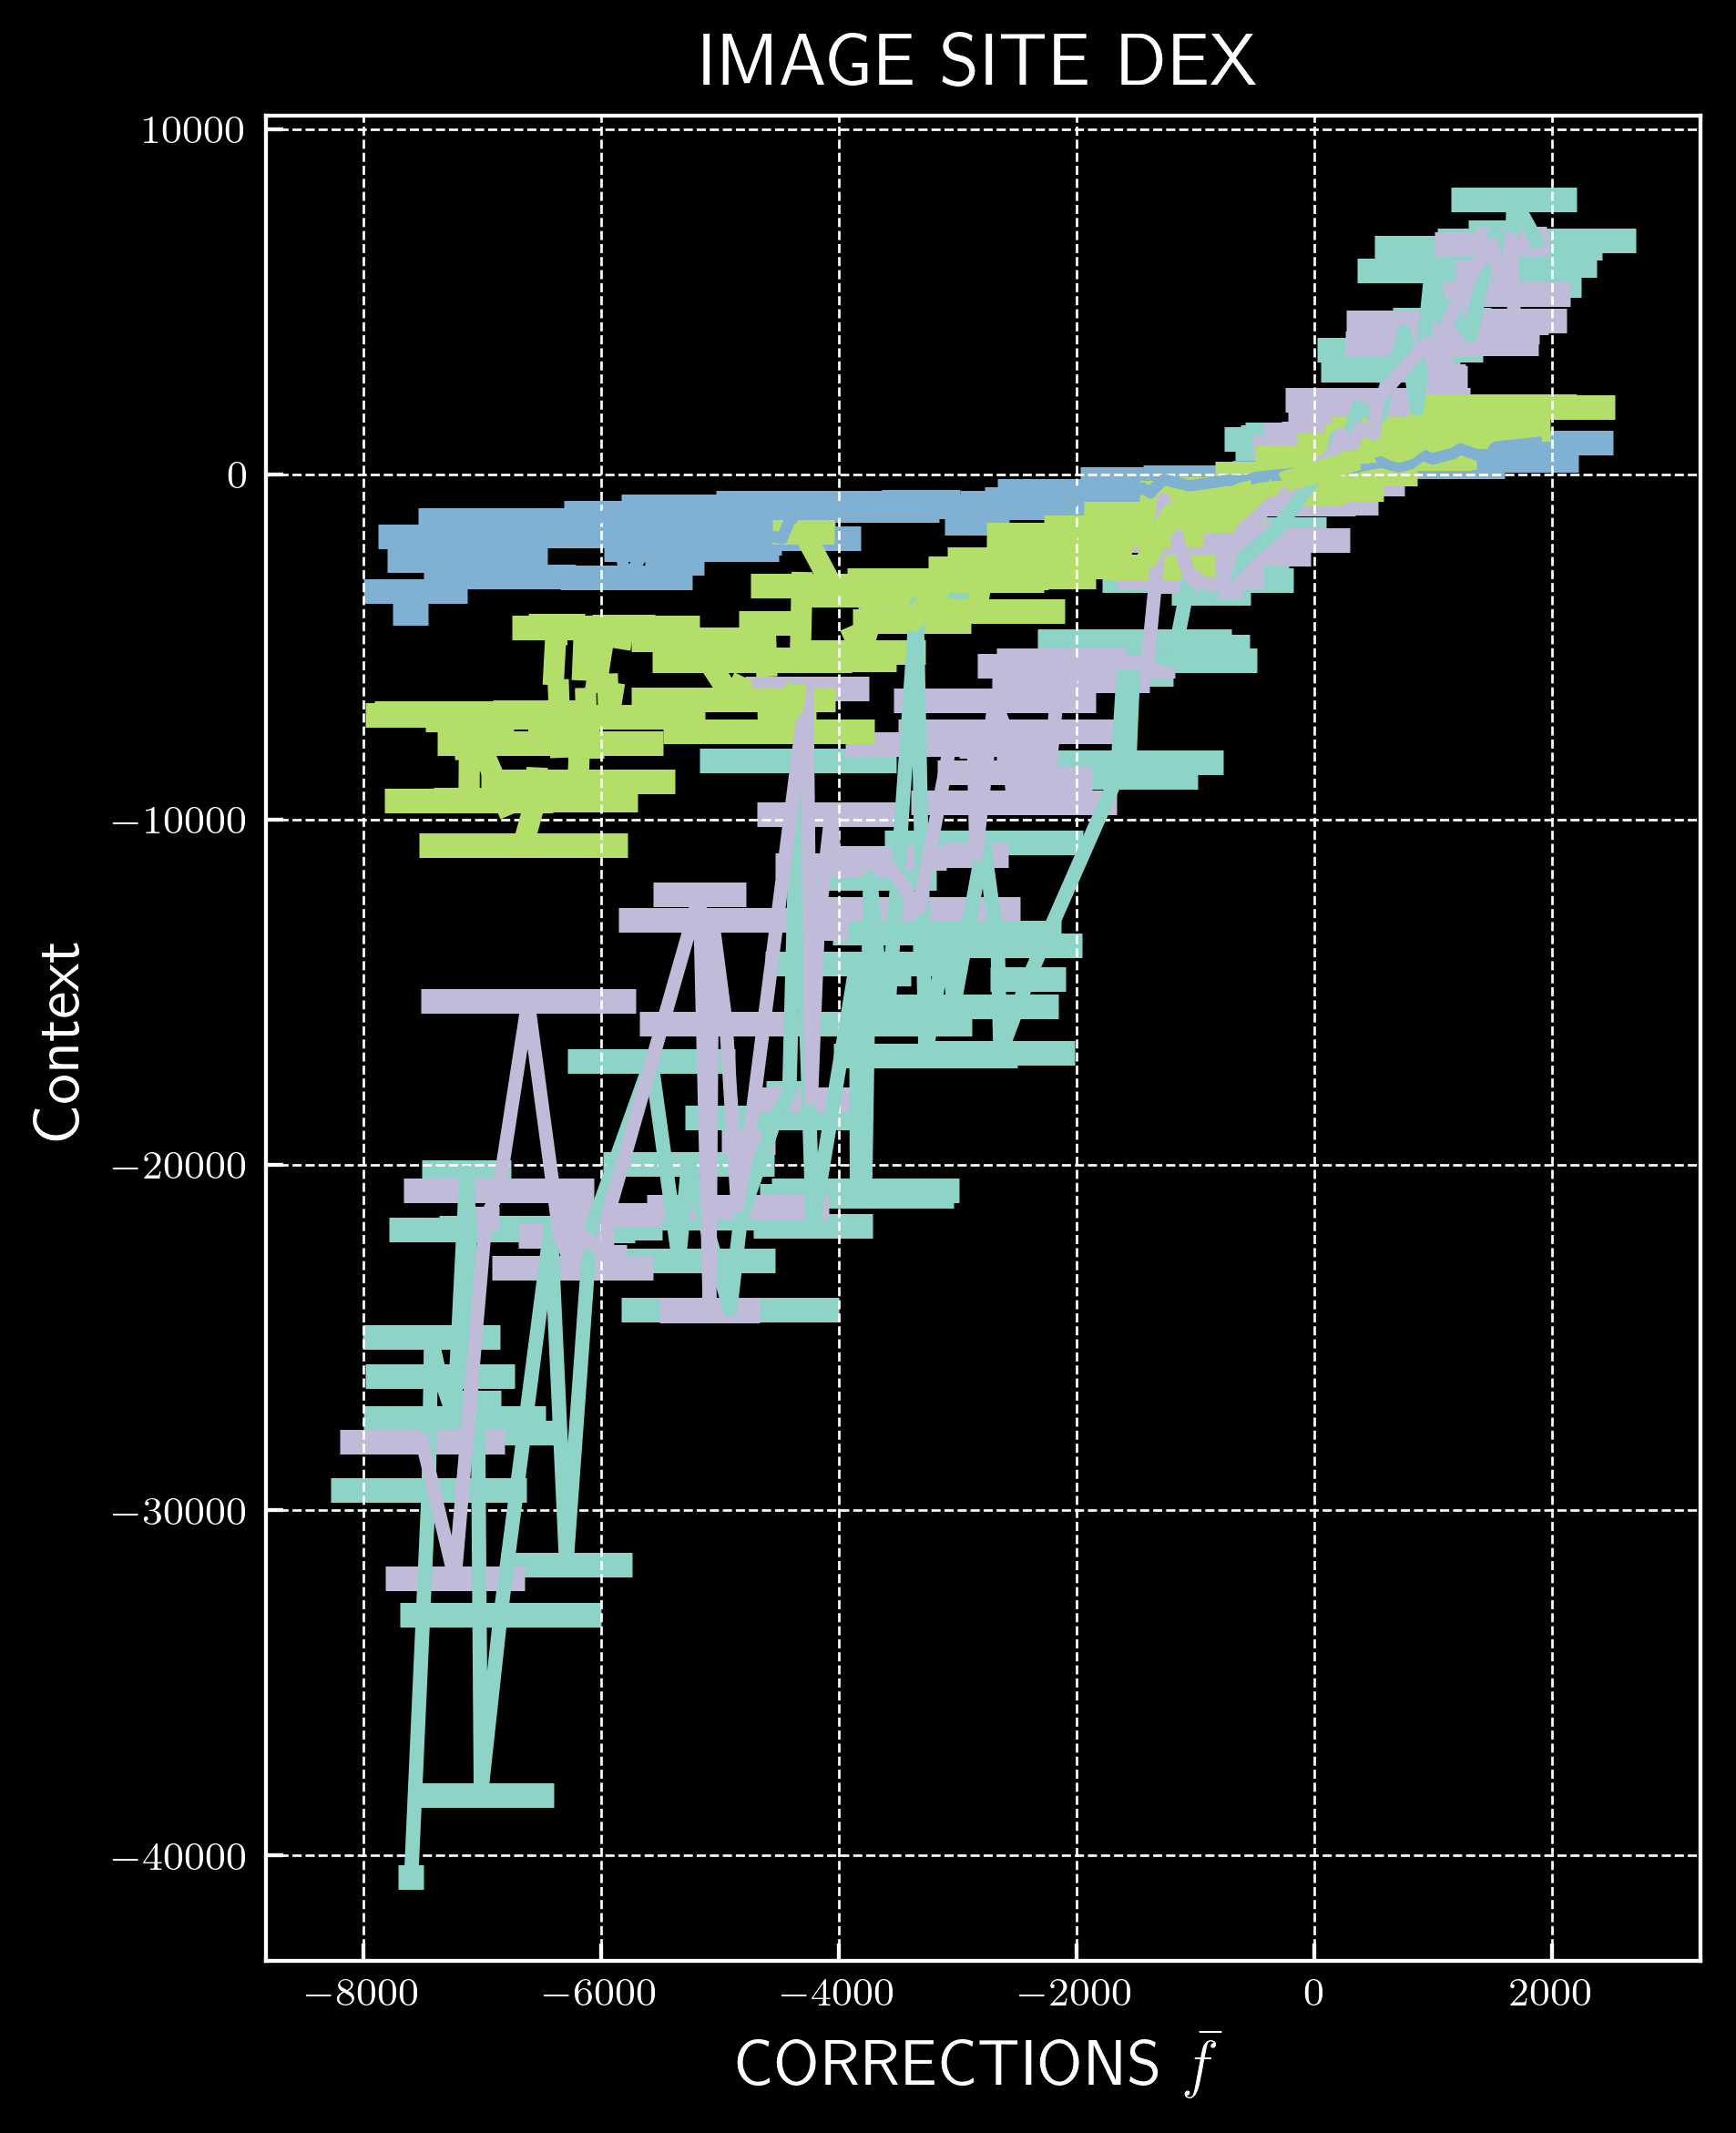

In [28]:
fig

## Generate QA Pairs from saved data

Inspiration comes from:
* cPAPERS: http://arxiv.org/abs/2406.08398

### Basics: L1

#### Figure-level questions
1. How many plots

In [103]:
#for k,data in datas_all.items():
def q1(data, qa_pairs, return_qa=True):
    q1 = 'How many panels are in this figure?'
    q1 += ' You are a helpful assistant, please format the output as a json as {"nrows":"", "ncols":""} to store the number of rows and columns.'
    a1 = {"nrows":data['figure']['nrows'], "ncols":data['figure']['ncols']}
    print('QUESTION:', q1)
    print('ANSWER:', a1)
    print('')
    # add to pairs
    if return_qa: 
        qa_pairs['Level 1']['Figure-level questions']['rows/columns'] = {'Q':q1, 'A':a1}
    return qa_pairs

2. What is the plot style?

In [104]:
#for k,data in datas_all.items():
def q2(data, qa_pairs, return_qa=True):
    q2 = 'Assuming this is a figure made with matplotlib in Python, what is the plot style used?  Examples of plotting styles are "classic" or "ggplot".'
    q2 += ' You are a helpful assistant, please format the output as a json as {"plot style":""} to store the matplotlib plotting style used in the figure.'
    a2 = {"plot style":data['figure']['plot style']}
    print('QUESTION:', q2)
    print('ANSWER:', a2)
    print('')
    # add to pairs
    if return_qa: qa_pairs['Level 1']['Figure-level questions']['plot style'] = {'Q':q2, 'A':a2}
    return qa_pairs

3. Color map

In [105]:
#for k,data in datas_all.items():
def q3(data, qa_pairs, return_qa=True):
    q2 = 'Assuming this is a figure made with matplotlib in Python, what is the colormap that was used?  Examples of matplotlib colormaps are "rainbow" or "Reds".'
    q2 += ' You are a helpful assistant, please format the output as a json as {"colormap":""} to store the matplotlib colormap used in the figure.'
    a2 = {"colormap":data['figure']['color map']}
    print('QUESTION:', q2)
    print('ANSWER:', a2)
    print('')
    # add to pairs
    if return_qa: qa_pairs['Level 1']['Figure-level questions']['colormap'] = {'Q':q2, 'A':a2, 
                                                                 'notes':"Some of the plot styles don't allow for updates to the colormap for REASONS, so just keep that in mind."}
    return qa_pairs

4. Aspect ratio

In [106]:
#for k,data in datas_all.items():
def q4(data, qa_pairs, return_qa=True):
    q1 = 'What is the aspect ratio of this figure?'
    q1 += ' You are a helpful assistant, please format the output as a json as {"aspect ratio":""} to store the aspect ratio of the plot.'
    a1 = {"aspect ratio":data['figure']['aspect ratio']}
    print('QUESTION:', q1)
    print('ANSWER:', a1)
    print('')
    # add to pairs
    if return_qa: qa_pairs['Level 1']['Figure-level questions']['aspect ratio'] = {'Q':q1, 'A':a1}
    return qa_pairs

5. DPI

In [107]:
def dpi(data, qa_pairs, return_qa=True):
    q1 = 'What is the DPI (dots per square inch) of this figure?'
    q1 += ' You are a helpful assistant, please format the output as a json as {"dpi":""} to store the DPI of the plot.'
    a1 = {"dpi":data['figure']['dpi']}
    print('QUESTION:', q1)
    print('ANSWER:', a1)
    print('')
    # add to pairs
    if return_qa: 
        qa_pairs['Level 1']['Figure-level questions']['dpi'] = {'Q':q1, 'A':a1}
        return qa_pairs

In [108]:
dpi(datas, qa_pairs, return_qa=False)

QUESTION: What is the DPI (dots per square inch) of this figure? You are a helpful assistant, please format the output as a json as {"dpi":""} to store the DPI of the plot.
ANSWER: {'dpi': 168}



#### Specific to individual plots

Title/axis labels:

In [109]:
def q_plot_titles(data, qa_pairs, return_qa=True):
    q = 'What are the titles for each figure panel?'
    q += ' You are a helpful assistant, please format the output as a json as {"titles":[]}, where the list is a list of strings of all of the titles.  '
    q += 'If there is a single plot, this should be one element in this list, and if there are multiple plots the list should be in row-major (C-style) order.'
    q += " If a plot does not have a title, then denote this by an empty string in the list.  Please format any formulas in the title in a Python LaTeX string (for example 'Light $\\\\alpha$'). "
    la = []
    for k,v in data.items():
        if 'plot' in k: # is a plot
            if 'title' not in v:
                la.append("")
            else:
                la.append(v['title']['words'])
    a = {"title":la}
    print('QUESTION:', q)
    print('ANSWER:', a)
    if return_qa: 
        qa_pairs['Level 1']['Plot-level questions']['titles'] = {'Q':q, 'A':a}
        return qa_pairs

In [110]:
q_plot_titles(datas, qa_pairs, return_qa=False)

QUESTION: What are the titles for each figure panel? You are a helpful assistant, please format the output as a json as {"titles":[]}, where the list is a list of strings of all of the titles.  If there is a single plot, this should be one element in this list, and if there are multiple plots the list should be in row-major (C-style) order. If a plot does not have a title, then denote this by an empty string in the list.  Please format any formulas in the title in a Python LaTeX string (for example 'Light $\\alpha$'). 
ANSWER: {'title': ['', 'VALIDITY', '', 'LINE $(E_{51}/n_1) \\sim (1100\\pm600)d_5^5$  TOROIDAL SUBSTRUCTURES CASE', 'Resolution Selection']}


In [111]:
def q_plot_xlabels(data, qa_pairs, return_qa=True):
    q = 'What are the x-axis titles for each figure panel?'
    q += ' You are a helpful assistant, please format the output as a json as {"xlabels":[]}, where the list is a list of strings of all of the x-axis titles.  '
    q += 'If there is a single plot, this should be one element in this list, and if there are multiple plots the list should be in row-major (C-style) order.'
    q += " If a plot does not have an x-axis title, then denote this by an empty string in the list.  "
    q += "Please format any formulas in the title in a Python LaTeX string (for example 'Light $\\\\alpha$'). "
    la = []
    for k,v in data.items():
        if 'plot' in k: # is a plot
            if 'xlabel' not in v:
                la.append("")
            else:
                la.append(v['xlabel']['words'])
    a = {"xlabels":la}
    print('QUESTION:', q)
    print('ANSWER:', a)
    if return_qa: 
        qa_pairs['Level 1']['Plot-level questions']['xlabels'] = {'Q':q, 'A':a}
        return qa_pairs

In [112]:
q_plot_xlabels(datas, qa_pairs, return_qa=False)

QUESTION: What are the x-axis titles for each figure panel? You are a helpful assistant, please format the output as a json as {"xlabels":[]}, where the list is a list of strings of all of the x-axis titles.  If there is a single plot, this should be one element in this list, and if there are multiple plots the list should be in row-major (C-style) order. If a plot does not have an x-axis title, then denote this by an empty string in the list.  Please format any formulas in the title in a Python LaTeX string (for example 'Light $\\alpha$'). 
ANSWER: {'xlabels': ['Derivation $\\dot{M}_{\\rm sphere}$  Papers', 'EXTRACTION EXTRAPOLATION $\\Lambda = 602.3\\,$ ', 'VHE $p(D_{i,\\rm{true}}|D_{i,\\rm{obs}})$  SCALES', 'TIMESCALE COMBINATION DOUBT', 'enters vhe']}


In [113]:
def q_plot_ylabels(data, qa_pairs, return_qa=True):
    q = 'What are the y-axis titles for each figure panel?'
    q += ' You are a helpful assistant, please format the output as a json as {"ylabels":[]}, where the list is a list of strings of all of the y-axis titles.  '
    q += 'If there is a single plot, this should be one element in this list, and if there are multiple plots the list should be in row-major (C-style) order.'
    q += " If a plot does not have an y-axis title, then denote this by an empty string in the list.  "
    q += "Please format any formulas in the title in a Python LaTeX string (for example 'Light $\\\\alpha$'). "
    la = []
    for k,v in data.items():
        if 'plot' in k: # is a plot
            if 'ylabel' not in v:
                la.append("")
            else:
                la.append(v['ylabel']['words'])
    a = {"ylabels":la}
    print('QUESTION:', q)
    print('ANSWER:', a)
    if return_qa: 
        qa_pairs['Level 1']['Plot-level questions']['ylabels'] = {'Q':q, 'A':a}
        return qa_pairs

In [114]:
q_plot_ylabels(datas, qa_pairs, return_qa=False)

QUESTION: What are the y-axis titles for each figure panel? You are a helpful assistant, please format the output as a json as {"ylabels":[]}, where the list is a list of strings of all of the y-axis titles.  If there is a single plot, this should be one element in this list, and if there are multiple plots the list should be in row-major (C-style) order. If a plot does not have an y-axis title, then denote this by an empty string in the list.  Please format any formulas in the title in a Python LaTeX string (for example 'Light $\\alpha$'). 
ANSWER: {'ylabels': ['TESTING CAR', 'characteristics', 'Conclusion', 'Hospitality', 'Asteroid Coverage Lists']}


x/y tick label values

In [115]:
def ticklabels(data, qa_pairs, tick_type='x', return_qa=True):
    q = 'What are the values for each of the tick marks on the '+tick_type+'-axis?'
    q += ' You are a helpful assistant, please format the output as a json as {"'+tick_type+'tick values":[[]]}, where each element of the outer list refers to a single panel, '
    q += 'and each inner list is a list of the '+tick_type+'-axis tick mark values. '
    q += 'If there is a single plot, this should be one element in the outer list, and if there are multiple plots the outer list should be in row-major (C-style) order.'
    q += " If a plot does not have any "+tick_type+"-axis tick values, then denote this by an empty string in the inner list.  "
    q += "Please format any formulas in the "+tick_type+"-axis tick values in a Python LaTeX string (for example 'Light $\\\\alpha$'). "
    la = []
    for k,v in data.items():
        if 'plot' in k: # is a plot
            if tick_type+'ticks' not in v:
                la.append("")
            else:
                t = []
                for l in v[tick_type+'ticks']:
                    t.append(l['data'])
                la.append(t)
    a = {tick_type+"tick values":la}
    print('QUESTION:', q)
    print('ANSWER:', a)
    if return_qa: 
        qa_pairs['Level 1']['Plot-level questions'][tick_type+'tick values'] = {'Q':q, 'A':a}
        return qa_pairs

In [116]:
ticklabels(datas, qa_pairs, tick_type='x', return_qa=False)

QUESTION: What are the values for each of the tick marks on the x-axis? You are a helpful assistant, please format the output as a json as {"xtick values":[[]]}, where each element of the outer list refers to a single panel, and each inner list is a list of the x-axis tick mark values. If there is a single plot, this should be one element in the outer list, and if there are multiple plots the outer list should be in row-major (C-style) order. If a plot does not have any x-axis tick values, then denote this by an empty string in the inner list.  Please format any formulas in the x-axis tick values in a Python LaTeX string (for example 'Light $\\alpha$'). 
ANSWER: {'xtick values': [['−1000', '0', '1000', '2000', '3000', '4000', '5000'], ['2500', '3000', '3500', '4000', '4500', '5000', '5500', '6000', '6500'], ['−2000', '0', '2000', '4000', '6000', '8000', '10000'], ['−8000', '−7000', '−6000', '−5000', '−4000', '−3000', '−2000', '−1000', '0', '1000'], ['−8000', '−6000', '−4000', '−2000', 

In [117]:
ticklabels(datas, qa_pairs, tick_type='y', return_qa=False)

QUESTION: What are the values for each of the tick marks on the y-axis? You are a helpful assistant, please format the output as a json as {"ytick values":[[]]}, where each element of the outer list refers to a single panel, and each inner list is a list of the y-axis tick mark values. If there is a single plot, this should be one element in the outer list, and if there are multiple plots the outer list should be in row-major (C-style) order. If a plot does not have any y-axis tick values, then denote this by an empty string in the inner list.  Please format any formulas in the y-axis tick values in a Python LaTeX string (for example 'Light $\\alpha$'). 
ANSWER: {'ytick values': [['−30000', '−20000', '−10000', '0', '10000', '20000', '30000'], ['−40000', '−30000', '−20000', '−10000', '0', '10000', '20000'], ['−80000', '−60000', '−40000', '−20000', '0', '20000', '40000'], ['−50000', '−40000', '−30000', '−20000', '−10000', '0', '10000', '20000', '30000'], ['−30000', '−20000', '−10000', '0

Plot types:

In [118]:
def q_plot_types(data, qa_pairs, plot_types, return_qa=True, use_list=True):
    q = 'What are the plot types for each panel in the figure? '
    q += 'You are a helpful assistant, please format the output as a json as {"plot types":[]}, where each element of the list refers to the plot type of a single panel. '
    q += 'If there is a single plot, this should be one element in this list, and if there are multiple plots the list should be in row-major (C-style) order. '
    if use_list:
        q += 'Please choose each plot type from the following list: ['
        for pt in plot_types:
            q += pt + ', '
        q = q[:-2] # take off the last bit
        q += '].'
    la = []
    for k,v in data.items():
        if 'plot' in k: # is a plot
            if 'type' not in v:
                la.append("")
            else:
                la.append(v['type'])
    a = {"plot types":la}
    print('QUESTION:', q)
    print('ANSWER:', a)
    if return_qa: 
        qa_pairs['Level 1']['Plot-level questions']['plot types'] = {'Q':q, 'A':a}
        return qa_pairs

In [119]:
q_plot_types(datas, qa_pairs, plot_types, return_qa=False, use_list=True)

QUESTION: What are the plot types for each panel in the figure? You are a helpful assistant, please format the output as a json as {"plot types":[]}, where each element of the list refers to the plot type of a single panel. If there is a single plot, this should be one element in this list, and if there are multiple plots the list should be in row-major (C-style) order. Please choose each plot type from the following list: [line, line, line, line, line].
ANSWER: {'plot types': ['line', 'line', 'line', 'line', 'line']}


In [120]:
q_plot_types(datas, qa_pairs, plot_types, return_qa=False, use_list=False)

QUESTION: What are the plot types for each panel in the figure? You are a helpful assistant, please format the output as a json as {"plot types":[]}, where each element of the list refers to the plot type of a single panel. If there is a single plot, this should be one element in this list, and if there are multiple plots the list should be in row-major (C-style) order. 
ANSWER: {'plot types': ['line', 'line', 'line', 'line', 'line']}


#### Line plot - specific questions
If line plot: how many lines?

In [121]:
# plot index to words
n_to_word = {0:'first', 1:'second', 2:'third', 3:'fourth', 4:'fifth'}
# ... for the plot in the [] panel...
def plot_index_to_words(pind):
    y = pind[0] # row
    x = pind[1] # column
    if y == 0 and x == 0:
        p = 'top-left' 
    elif y == 0:
        p = 'top row and ' + n_to_word[x] + ' from the left'
    elif x == 0:
        p = n_to_word[y] + ' row and left-most'
    else:
        p = n_to_word[x] + 'row and ' + n_to_word[y] + ' column'
    return p

In [122]:
# this version tries to give column and row numbers
def q_nlines_plot_plotnums(data, qa_pairs, plot_num = 0, return_qa=True):
    # rows columns
    nrow = data['figure']['plot indexes'][plot_num][0]
    ncol = data['figure']['plot indexes'][plot_num][1]
    q = 'The following question refers to the figure panel on row number ' + str(nrow) + ' and column number ' + str(ncol) + '. '
    q += 'If there are multiple plots the panels will be in row-major (C-style) order, with the numbering starting at (0,0) in the upper left panel. '
    q += 'If there is one plot, then this row and column refers to the single plot. '
    q += 'How many different lines are there for the figure panel on row number ' + str(nrow) + ' and column number ' + str(ncol) + '? '
    q += 'You are a helpful assistant, please format the output as a json as {"nlines":""} for this figure panel, where the "nlines" value should be an integer.'
    # get answer list
    la = []
    for k,v in data.items():
        if 'plot' + str(plot_num) in k: # is a plot
            nlines = len(v['data']['data params'].keys())
            la.append(nlines)
    a = {"nlines (plot numbers)":{'plot'+str(plot_num):la[0]}} # the 0 is a bit hacky
    print('QUESTION:', q)
    print('ANSWER:', a)
    if return_qa: 
        if 'nlines' not in qa_pairs['Level 1']['Plot-level questions']:
            qa_pairs['Level 1']['Plot-level questions']['nlines (plot numbers)'] = {'plot'+str(plot_num):{'Q':q, 'A':a}}
        else:
            qa_pairs['Level 1']['Plot-level questions']['nlines (plot numbers)']['plot'+str(plot_num)] = {'Q':q, 'A':a}
        return qa_pairs

In [123]:
plot_num = 0
#print(datas['figure']['plot indexes'][plot_num])

if datas['plot'+str(plot_num)]['type'] == 'line':
    q_nlines_plot_plotnums(datas, qa_pairs, plot_num=plot_num, return_qa=False)

QUESTION: The following question refers to the figure panel on row number 0 and column number 0. If there are multiple plots the panels will be in row-major (C-style) order, with the numbering starting at (0,0) in the upper left panel. If there is one plot, then this row and column refers to the single plot. How many different lines are there for the figure panel on row number 0 and column number 0? You are a helpful assistant, please format the output as a json as {"nlines":""} for this figure panel, where the "nlines" value should be an integer.
ANSWER: {'nlines (plot numbers)': {'plot0': 9}}


In [124]:
# this version tries to use words
def q_nlines_plot(data, qa_pairs, plot_num = 0, return_qa=True):
    # how many plots
    nplots = 0
    for k,v in data.items():
        if 'plot' in k:
            nplots += 1
    if nplots == 1: # single plot
        q = 'How many different lines are there on this figure? '
        q += 'You are a helpful assistant, please format the output as a json as {"nlines":""} for this figure panel, where the "nlines" value should be an integer.'
    else:
        q = 'How many different lines are there for the plot in the ' + plot_index_to_words(data['figure']['plot indexes'][plot_num]) + ' panel? '     
        q += 'You are a helpful assistant, please format the output as a json as {"nlines":""} for this figure panel, where the "nlines" value should be an integer.'
    # get answer list
    la = []
    for k,v in data.items():
        if 'plot' + str(plot_num) in k: # is a plot
            nlines = len(v['data']['data params'].keys())
            la.append(nlines)
    a = {"nlines (words)":{'plot'+str(plot_num):la[0]}} # the 0 is a bit hacky
    print('QUESTION:', q)
    print('ANSWER:', a)
    if return_qa: 
        if 'nlines' not in qa_pairs['Level 1']['Plot-level questions']:
            qa_pairs['Level 1']['Plot-level questions']['nlines (words)'] = {'plot'+str(plot_num):{'Q':q, 'A':a}}
        else:
            qa_pairs['Level 1']['Plot-level questions']['nlines (words)']['plot'+str(plot_num)] = {'Q':q, 'A':a}
        return qa_pairs


In [125]:
plot_num = 0
#print(datas['figure']['plot indexes'][plot_num])

if datas['plot'+str(plot_num)]['type'] == 'line':
    q_nlines_plot(datas, qa_pairs, plot_num=plot_num, return_qa=False)

QUESTION: How many different lines are there for the plot in the top-left panel? You are a helpful assistant, please format the output as a json as {"nlines":""} for this figure panel, where the "nlines" value should be an integer.
ANSWER: {'nlines (words)': {'plot0': 9}}


Colors of each line:

In [126]:
def q_colors_lines(data, qa_pairs, plot_num = 0, return_qa=True, use_words=True):
    """
    use_words : set to True to translate row, column to words; False will use C-ordering indexing
    """
    big_tag = 'line colors'
    if not use_words:
        adder = '(plot numbers)'
        # rows columns
        nrow = data['figure']['plot indexes'][plot_num][0]
        ncol = data['figure']['plot indexes'][plot_num][1]
        q = 'The following question refers to the figure panel on row number ' + str(nrow) + ' and column number ' + str(ncol) + '. '
        q += 'If there are multiple plots the panels will be in row-major (C-style) order, with the numbering starting at (0,0) in the upper left panel. '
        q += 'If there is one plot, then this row and column refers to the single plot. '
        q += 'What are the colors of the lines for the figure panel on row number ' + str(nrow) + ' and column number ' + str(ncol) + '? '
    else: 
        adder = '(words)'
        # how many plots
        nplots = 0
        for k,v in data.items():
            if 'plot' in k:
                nplots += 1
        if nplots == 1: # single plot
            q = 'What are the colors of the lines in this figure? '
        else:
            q = 'What are the colors of the lines for the plot in the ' + plot_index_to_words(data['figure']['plot indexes'][plot_num]) + ' panel? '     

    q += 'You are a helpful assistant, please format the output as a json as {"line colors":[]}, where each element of the list refers to the '
    q += ' color of each line in the figure panel in the form of an RGBA list with values between 0 and 1. '
    # get answer list
    la = []
    for k,v in data.items():
        if 'plot' + str(plot_num) in k: # is a plot
            for c in v['data from plot']['plot params']['colors']:
                la.append(c[0]) # the "0" here is because, in theory, the line could be made up of more than one color

    a = {big_tag + ' ' + adder:{'plot'+str(plot_num):la}} 
    print('QUESTION:', q)
    print('ANSWER:', a)
    if return_qa: 
        if big_tag not in qa_pairs['Level 1']['Plot-level questions']:
            qa_pairs['Level 1']['Plot-level questions'][big_tag + ' ' + adder] = {'plot'+str(plot_num):{'Q':q, 'A':a}}
        else:
            qa_pairs['Level 1']['Plot-level questions'][big_tag + ' ' + adder]['plot'+str(plot_num)] = {'Q':q, 'A':a}
        return qa_pairs

In [127]:
plot_num = 0
print(datas['figure']['plot indexes'][plot_num])
print(plot_index_to_words(datas['figure']['plot indexes'][plot_num]))
print('')

if datas['plot'+str(plot_num)]['type'] == 'line':
    q_colors_lines(datas, qa_pairs, plot_num=plot_num, return_qa=False, use_words=False)
    print('')
    q_colors_lines(datas, qa_pairs, plot_num=plot_num, return_qa=False, use_words=True)

[0 0]
top-left

QUESTION: The following question refers to the figure panel on row number 0 and column number 0. If there are multiple plots the panels will be in row-major (C-style) order, with the numbering starting at (0,0) in the upper left panel. If there is one plot, then this row and column refers to the single plot. What are the colors of the lines for the figure panel on row number 0 and column number 0? You are a helpful assistant, please format the output as a json as {"line colors":[]}, where each element of the list refers to the  color of each line in the figure panel in the form of an RGBA list with values between 0 and 1. 
ANSWER: {'line colors (plot numbers)': {'plot0': [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]}}

QUESTION: What are the colors of the lines for the plot in the top-left panel? You are a helpful assistant, please format the output as a json as {

Linestyles of each plot:

In [128]:
def q_linestyles_lines(data, qa_pairs, plot_num = 0, return_qa=True, use_words=True, use_list=False,
                      linestyle_list = []):
    """
    use_words : set to True to translate row, column to words; False will use C-ordering indexing
    use_list : use a list of linestyle options for prompting
    """
    
    big_tag = 'line styles'
    if not use_words:
        adder = '(plot numbers)'
        # rows columns
        nrow = data['figure']['plot indexes'][plot_num][0]
        ncol = data['figure']['plot indexes'][plot_num][1]
        q = 'The following question refers to the figure panel on row number ' + str(nrow) + ' and column number ' + str(ncol) + '. '
        q += 'If there are multiple plots the panels will be in row-major (C-style) order, with the numbering starting at (0,0) in the upper left panel. '
        q += 'If there is one plot, then this row and column refers to the single plot. '
        q += 'What are the '+big_tag+' of the lines for the figure panel on row number ' + str(nrow) + ' and column number ' + str(ncol) + '? '
    else: 
        adder = '(words)'
        # how many plots
        nplots = 0
        for k,v in data.items():
            if 'plot' in k:
                nplots += 1
        if nplots == 1: # single plot
            q = 'What are the matplotlib linestyles in this figure? '
        else:
            q = 'What are the matplotlib linestyles for the plot in the ' + plot_index_to_words(data['figure']['plot indexes'][plot_num]) + ' panel? '     

    q += 'You are a helpful assistant, please format the output as a json as {"line styles":[]}, where each element of the list refers to the '
    q += ' linestyle of each line in the figure panel in the form a matplotlib linestyle type. '
    if use_list:
        adder = adder.split(')')[0] + ' + list)'
        q += 'Please choose each linestyle from the following list: ['
        for pt in linestyle_list:
            q += pt + ', '
        q = q[:-2] # take off the last bit
        q += '].'

    # get answer list
    la = []
    for k,v in data.items():
        if 'plot' + str(plot_num) in k: # is a plot
            for c in v['data from plot']['plot params']['linestyles']:
                la.append(c) 

    a = {big_tag + ' ' + adder:{'plot'+str(plot_num):la}} 
    print('QUESTION:', q)
    print('ANSWER:', a)
    if return_qa: 
        if big_tag not in qa_pairs['Level 1']['Plot-level questions']:
            qa_pairs['Level 1']['Plot-level questions'][big_tag + ' ' + adder] = {'plot'+str(plot_num):{'Q':q, 'A':a}}
        else:
            qa_pairs['Level 1']['Plot-level questions'][big_tag + ' ' + adder]['plot'+str(plot_num)] = {'Q':q, 'A':a}
        return qa_pairs

In [129]:
plot_num = 0
print(datas['figure']['plot indexes'][plot_num])
print(plot_index_to_words(datas['figure']['plot indexes'][plot_num]))
print('')

if datas['plot'+str(plot_num)]['type'] == 'line':
    q_linestyles_lines(datas, qa_pairs, plot_num=plot_num, return_qa=False, use_words=False, use_list=False)
    print('')
    q_linestyles_lines(datas, qa_pairs, plot_num=plot_num, return_qa=False, use_words=True, use_list = False)
    print('')
    q_linestyles_lines(datas, qa_pairs, plot_num=plot_num, return_qa=False, use_words=False, use_list=True,
                      linestyle_list=linestyles)
    print('')
    q_linestyles_lines(datas, qa_pairs, plot_num=plot_num, return_qa=False, use_words=True, use_list = True,
                      linestyle_list=linestyles)


[0 0]
top-left

QUESTION: The following question refers to the figure panel on row number 0 and column number 0. If there are multiple plots the panels will be in row-major (C-style) order, with the numbering starting at (0,0) in the upper left panel. If there is one plot, then this row and column refers to the single plot. What are the line styles of the lines for the figure panel on row number 0 and column number 0? You are a helpful assistant, please format the output as a json as {"line styles":[]}, where each element of the list refers to the  linestyle of each line in the figure panel in the form a matplotlib linestyle type. 
ANSWER: {'line styles (plot numbers)': {'plot0': ['-', '--', ':', '-', '-', '--', ':', ':', '-']}}

QUESTION: What are the matplotlib linestyles for the plot in the top-left panel? You are a helpful assistant, please format the output as a json as {"line styles":[]}, where each element of the list refers to the  linestyle of each line in the figure panel in 

Line thickness:

In [130]:
def q_linethickness_lines(data, qa_pairs, plot_num = 0, return_qa=True, use_words=True, use_list=False,
                      line_list = []):
    """
    use_words : set to True to translate row, column to words; False will use C-ordering indexing
    use_list : use a list of "property" options for prompting
    """
    
    big_tag = 'line thicknesses'
    big_tag_single = 'line thickness'
    big_tag_short = 'thickness'
    plot_param_tag = 'linethick'
    if not use_words:
        adder = '(plot numbers)'
        # rows columns
        nrow = data['figure']['plot indexes'][plot_num][0]
        ncol = data['figure']['plot indexes'][plot_num][1]
        q = 'The following question refers to the figure panel on row number ' + str(nrow) + ' and column number ' + str(ncol) + '. '
        q += 'If there are multiple plots the panels will be in row-major (C-style) order, with the numbering starting at (0,0) in the upper left panel. '
        q += 'If there is one plot, then this row and column refers to the single plot. '
        q += 'What are the '+big_tag+' of the lines for the figure panel on row number ' + str(nrow) + ' and column number ' + str(ncol) + '? '
    else: 
        adder = '(words)'
        # how many plots
        nplots = 0
        for k,v in data.items():
            if 'plot' in k:
                nplots += 1
        if nplots == 1: # single plot
            q = 'What are the matplotlib '+big_tag+' in this figure? '
        else:
            q = 'What are the matplotlib '+big_tag+' for the plot in the ' + plot_index_to_words(data['figure']['plot indexes'][plot_num]) + ' panel? '     

    q += 'You are a helpful assistant, please format the output as a json as {"'+big_tag_single+'":[]}, where each element of the list refers to the '
    q += ' '+big_tag_short+' of each line in the figure panel in the form a matplotlib '+big_tag_short+' type. '
    if use_list:
        adder = adder.split(')')[0] + ' + list)'
        q += 'Please choose each '+big_tag_short+' from the following list: ['
        for pt in line_list:
            q += pt + ', '
        q = q[:-2] # take off the last bit
        q += '].'

    # get answer list
    la = []
    for k,v in data.items():
        if 'plot' + str(plot_num) in k: # is a plot
            for c in v['data from plot']['plot params'][plot_param_tag]:
                la.append(c) 

    a = {big_tag + ' ' + adder:{'plot'+str(plot_num):la}} 
    print('QUESTION:', q)
    print('ANSWER:', a)
    if return_qa: 
        if big_tag not in qa_pairs['Level 1']['Plot-level questions']:
            qa_pairs['Level 1']['Plot-level questions'][big_tag + ' ' + adder] = {'plot'+str(plot_num):{'Q':q, 'A':a}}
        else:
            qa_pairs['Level 1']['Plot-level questions'][big_tag + ' ' + adder]['plot'+str(plot_num)] = {'Q':q, 'A':a}
        return qa_pairs

In [131]:
plot_num=0
if datas['plot'+str(plot_num)]['type'] == 'line':
    q_linethickness_lines(datas, qa_pairs, plot_num=plot_num, return_qa=False, use_words=False)
    print('')
    q_linethickness_lines(datas, qa_pairs, plot_num=plot_num, return_qa=False, use_words=True)

QUESTION: The following question refers to the figure panel on row number 0 and column number 0. If there are multiple plots the panels will be in row-major (C-style) order, with the numbering starting at (0,0) in the upper left panel. If there is one plot, then this row and column refers to the single plot. What are the line thicknesses of the lines for the figure panel on row number 0 and column number 0? You are a helpful assistant, please format the output as a json as {"line thickness":[]}, where each element of the list refers to the  thickness of each line in the figure panel in the form a matplotlib thickness type. 
ANSWER: {'line thicknesses (plot numbers)': {'plot0': [1.5782302136205462, 1.1414200782584496, 4.956572437712174, 2.609468978519862, 4.503195535761236, 4.928625040827664, 4.57066109012778, 3.114388442296972, 1.4597561857139998]}}

QUESTION: What are the matplotlib line thicknesses for the plot in the top-left panel? You are a helpful assistant, please format the out

Line markers:

In [132]:
def q_linemarkers_lines(data, qa_pairs, plot_num = 0, return_qa=True, use_words=True, use_list=False,
                      line_list = []):
    """
    use_words : set to True to translate row, column to words; False will use C-ordering indexing
    use_list : use a list of "property" options for prompting
    """
    
    big_tag = 'line markers'
    big_tag_single = 'line marker'
    big_tag_short = 'marker'
    plot_param_tag = 'markers'
    extra_if_empty = 'If there are no markers for a specific line, please indicate this with an empty "" for this element of the list.'
    if not use_words:
        adder = '(plot numbers)'
        # rows columns
        nrow = data['figure']['plot indexes'][plot_num][0]
        ncol = data['figure']['plot indexes'][plot_num][1]
        q = 'The following question refers to the figure panel on row number ' + str(nrow) + ' and column number ' + str(ncol) + '. '
        q += 'If there are multiple plots the panels will be in row-major (C-style) order, with the numbering starting at (0,0) in the upper left panel. '
        q += 'If there is one plot, then this row and column refers to the single plot. '
        q += 'What are the '+big_tag+' of the lines for the figure panel on row number ' + str(nrow) + ' and column number ' + str(ncol) + '? '
    else: 
        adder = '(words)'
        # how many plots
        nplots = 0
        for k,v in data.items():
            if 'plot' in k:
                nplots += 1
        if nplots == 1: # single plot
            q = 'What are the matplotlib '+big_tag+' in this figure? '
        else:
            q = 'What are the matplotlib '+big_tag+' for the plot in the ' + plot_index_to_words(data['figure']['plot indexes'][plot_num]) + ' panel? '     

    q += 'You are a helpful assistant, please format the output as a json as {"'+big_tag_single+'":[]}, where each element of the list refers to the '
    q += ' '+big_tag_short+' of each line in the figure panel in the form a matplotlib '+big_tag_short+' type. '
    q += extra_if_empty
    if use_list:
        adder = adder.split(')')[0] + ' + list)'
        q += 'Please choose each '+big_tag_short+' from the following list: ['
        for pt in line_list:
            q += pt + ', '
        q = q[:-2] # take off the last bit
        q += '].'

    # get answer list
    la = []
    for k,v in data.items():
        if 'plot' + str(plot_num) in k: # is a plot
            for c in v['data from plot']['plot params'][plot_param_tag]:
                la.append(c) 

    a = {big_tag + ' ' + adder:{'plot'+str(plot_num):la}} 
    print('QUESTION:', q)
    print('ANSWER:', a)
    if return_qa: 
        if big_tag not in qa_pairs['Level 1']['Plot-level questions']:
            qa_pairs['Level 1']['Plot-level questions'][big_tag + ' ' + adder] = {'plot'+str(plot_num):{'Q':q, 'A':a}}
        else:
            qa_pairs['Level 1']['Plot-level questions'][big_tag + ' ' + adder]['plot'+str(plot_num)] = {'Q':q, 'A':a}
        return qa_pairs

In [133]:
plot_num=0
if datas['plot'+str(plot_num)]['type'] == 'line':
    q_linemarkers_lines(datas, qa_pairs, plot_num=plot_num, return_qa=False, use_words=False)
    print('')
    q_linemarkers_lines(datas, qa_pairs, plot_num=plot_num, return_qa=False, use_words=True)

QUESTION: The following question refers to the figure panel on row number 0 and column number 0. If there are multiple plots the panels will be in row-major (C-style) order, with the numbering starting at (0,0) in the upper left panel. If there is one plot, then this row and column refers to the single plot. What are the line markers of the lines for the figure panel on row number 0 and column number 0? You are a helpful assistant, please format the output as a json as {"line marker":[]}, where each element of the list refers to the  marker of each line in the figure panel in the form a matplotlib marker type. If there are no markers for a specific line, please indicate this with an empty "" for this element of the list.
ANSWER: {'line markers (plot numbers)': {'plot0': ['X', '<', 11, 2, 7, 'H', 'X', '1', 11]}}

QUESTION: What are the matplotlib line markers for the plot in the top-left panel? You are a helpful assistant, please format the output as a json as {"line marker":[]}, where 

In [134]:
def q_linemarkersize_lines(data, qa_pairs, plot_num = 0, return_qa=True, use_words=True, use_list=False,
                      line_list = []):
    """
    use_words : set to True to translate row, column to words; False will use C-ordering indexing
    use_list : use a list of "property" options for prompting
    """
    
    big_tag = 'line marker sizes'
    big_tag_single = 'line marker size'
    big_tag_short = 'marker size'
    plot_param_tag = 'marker size' # tag in the plot params
    extra_if_empty = 'If there are no markers for a specific line, please indicate this with an empty "" for this element of the list.'
    if not use_words:
        adder = '(plot numbers)'
        # rows columns
        nrow = data['figure']['plot indexes'][plot_num][0]
        ncol = data['figure']['plot indexes'][plot_num][1]
        q = 'The following question refers to the figure panel on row number ' + str(nrow) + ' and column number ' + str(ncol) + '. '
        q += 'If there are multiple plots the panels will be in row-major (C-style) order, with the numbering starting at (0,0) in the upper left panel. '
        q += 'If there is one plot, then this row and column refers to the single plot. '
        q += 'What are the '+big_tag+' of the lines for the figure panel on row number ' + str(nrow) + ' and column number ' + str(ncol) + '? '
    else: 
        adder = '(words)'
        # how many plots
        nplots = 0
        for k,v in data.items():
            if 'plot' in k:
                nplots += 1
        if nplots == 1: # single plot
            q = 'What are the matplotlib '+big_tag+' in this figure? '
        else:
            q = 'What are the matplotlib '+big_tag+' for the plot in the ' + plot_index_to_words(data['figure']['plot indexes'][plot_num]) + ' panel? '     

    q += 'You are a helpful assistant, please format the output as a json as {"'+big_tag_single+'":[]}, where each element of the list refers to the '
    q += ' '+big_tag_short+' of each line in the figure panel in the form a matplotlib '+big_tag_short+' type. '
    q += extra_if_empty
    if use_list:
        adder = adder.split(')')[0] + ' + list)'
        q += 'Please choose each '+big_tag_short+' from the following list: ['
        for pt in line_list:
            q += pt + ', '
        q = q[:-2] # take off the last bit
        q += '].'

    # get answer list
    la = []
    for k,v in data.items():
        if 'plot' + str(plot_num) in k: # is a plot
            for c in v['data from plot']['plot params'][plot_param_tag]:
                la.append(c) 

    a = {big_tag + ' ' + adder:{'plot'+str(plot_num):la}} 
    print('QUESTION:', q)
    print('ANSWER:', a)
    if return_qa: 
        if big_tag not in qa_pairs['Level 1']['Plot-level questions']:
            qa_pairs['Level 1']['Plot-level questions'][big_tag + ' ' + adder] = {'plot'+str(plot_num):{'Q':q, 'A':a}}
        else:
            qa_pairs['Level 1']['Plot-level questions'][big_tag + ' ' + adder]['plot'+str(plot_num)] = {'Q':q, 'A':a}
        return qa_pairs

In [135]:
plot_num=0
if datas['plot'+str(plot_num)]['type'] == 'line':
    q_linemarkersize_lines(datas, qa_pairs, plot_num=plot_num, return_qa=False, use_words=False)
    print('')
    q_linemarkersize_lines(datas, qa_pairs, plot_num=plot_num, return_qa=False, use_words=True)

QUESTION: The following question refers to the figure panel on row number 0 and column number 0. If there are multiple plots the panels will be in row-major (C-style) order, with the numbering starting at (0,0) in the upper left panel. If there is one plot, then this row and column refers to the single plot. What are the line marker sizes of the lines for the figure panel on row number 0 and column number 0? You are a helpful assistant, please format the output as a json as {"line marker size":[]}, where each element of the list refers to the  marker size of each line in the figure panel in the form a matplotlib marker size type. If there are no markers for a specific line, please indicate this with an empty "" for this element of the list.
ANSWER: {'line marker sizes (plot numbers)': {'plot0': [1, 1, 1, 1, 1, 1, 1, 1, 1]}}

QUESTION: What are the matplotlib line marker sizes for the plot in the top-left panel? You are a helpful assistant, please format the output as a json as {"line m

Values of x & y data points:

In [136]:
def q_datapoints_lines(data, qa_pairs, plot_num = 0, return_qa=True, use_words=True, 
                      line_list = []):
    """
    use_words : set to True to translate row, column to words; False will use C-ordering indexing
    use_list : use a list of "property" options for prompting
    """
    big_tag = 'data values'
    # how many plots
    nplots = 0
    for k,v in data.items(): # count number of plots
        if 'plot' in k:
            nplots += 1
    if not use_words:
        adder = '(plot numbers)'
        # rows columns
        nrow = data['figure']['plot indexes'][plot_num][0]
        ncol = data['figure']['plot indexes'][plot_num][1]
        q = 'The following question refers to the figure panel on row number ' + str(nrow) + ' and column number ' + str(ncol) + '. '
        q += 'If there are multiple plots the panels will be in row-major (C-style) order, with the numbering starting at (0,0) in the upper left panel. '
        q += 'If there is one plot, then this row and column refers to the single plot. '
    else: 
        adder = '(words)'

    if nplots == 1: # single plot
        q = 'What are the data values in this figure? '
    else:
        if not use_words:
            q += 'What are the data values for the figure panel on row number ' + str(nrow) + ' and column number ' + str(ncol) + '? '
        else:
            q = 'What are the data values for the plot in the ' + plot_index_to_words(data['figure']['plot indexes'][plot_num]) + ' panel? '     

    q += 'You are a helpful assistant, please format the output as a json as {"x":[], "y":[]} where the values of "x" and "y" are the '
    q += 'data values used to create the plot.  '
    q += 'If there is one single array for x data values for all lines on the plot, "x" will be a single list, otherwise it will be a list of lists. '
    q += 'If there is one single array for y data values for all lines on the plot, "y" will be a single list, otherwise it will be a list of lists. '
    
    # get answer list
    la = {"x":data['plot'+str(plot_num)]['data']['xs'], "y":data['plot'+str(plot_num)]['data']['ys']}
    a = {big_tag + ' ' + adder:{'plot'+str(plot_num):la}} 
    print('QUESTION:', q)
    print('ANSWER:', a)
    if return_qa: 
        if big_tag not in qa_pairs['Level 1']['Plot-level questions']:
            qa_pairs['Level 1']['Plot-level questions'][big_tag + ' ' + adder] = {'plot'+str(plot_num):{'Q':q, 'A':a}}
        else:
            qa_pairs['Level 1']['Plot-level questions'][big_tag + ' ' + adder]['plot'+str(plot_num)] = {'Q':q, 'A':a}
        return qa_pairs

In [137]:
plot_num=0
if datas['plot'+str(plot_num)]['type'] == 'line':
    q_datapoints_lines(datas, qa_pairs, plot_num=plot_num, return_qa=False, use_words=False)
    print('')
    q_datapoints_lines(datas, qa_pairs, plot_num=plot_num, return_qa=False, use_words=True)

QUESTION: The following question refers to the figure panel on row number 0 and column number 0. If there are multiple plots the panels will be in row-major (C-style) order, with the numbering starting at (0,0) in the upper left panel. If there is one plot, then this row and column refers to the single plot. What are the data values for the figure panel on row number 0 and column number 0? You are a helpful assistant, please format the output as a json as {"x":[], "y":[]} where the values of "x" and "y" are the data values used to create the plot.  If there is one single array for x data values for all lines on the plot, "x" will be a single list, otherwise it will be a list of lists. If there is one single array for y data values for all lines on the plot, "y" will be a single list, otherwise it will be a list of lists. 
ANSWER: {'data values (plot numbers)': {'plot0': {'x': [array([-969.7562172 , -769.37515261, -668.12927649, -639.12682921,
       -565.34007886, -169.48496638, -166.6

### Higher-level: L2

#### Plot-level questions
1. Stats for each plot

In [138]:
stats = {'minimum':np.min, 'maximum':np.max, 'median':np.median, 'mean':np.mean}
#stats.keys()
{'minimum':np.min}.values()

dict_values([<function min at 0x111ca6730>])

In [139]:
def q_stats_lines(data, qa_pairs, stat = {'minimum':np.min}, plot_num = 0, return_qa=True, use_words=True):
    """
    use_words : set to True to translate row, column to words; False will use C-ordering indexing
    stat : dictionary of the name and function to use for each stat
    """
    big_tag = list(stat.keys())[0]
    # how many plots
    nplots = 0
    for k,v in data.items(): # count number of plots
        if 'plot' in k:
            nplots += 1
    if not use_words:
        adder = '(plot numbers)'
        # rows columns
        nrow = data['figure']['plot indexes'][plot_num][0]
        ncol = data['figure']['plot indexes'][plot_num][1]
        q = 'The following question refers to the figure panel on row number ' + str(nrow) + ' and column number ' + str(ncol) + '. '
        q += 'If there are multiple plots the panels will be in row-major (C-style) order, with the numbering starting at (0,0) in the upper left panel. '
        q += 'If there is one plot, then this row and column refers to the single plot. '
    else: 
        adder = '(words)'

    if nplots == 1: # single plot
        q = 'What are the '+big_tag+' data values in this figure? '
    else:
        if not use_words:
            q += 'What are the '+big_tag+' data values for the figure panel on row number ' + str(nrow) + ' and column number ' + str(ncol) + '? '
        else:
            q = 'What are the '+big_tag+' data values for the plot in the ' + plot_index_to_words(data['figure']['plot indexes'][plot_num]) + ' panel? '     

    q += 'You are a helpful assistant, please format the output as a json as {"'+big_tag+' x":[], "'+big_tag+' y":[]} where the '+big_tag+' values of "x" and "y" are the '
    q += 'data values used to create the plot.  '
    q += 'If there is one single array for x data values for all lines on the plot, "'+big_tag+' x" will be a single item list. '
    q += 'If there is one single array for y data values for all lines on the plot, "'+big_tag+' y" will be a single item list. '
    #q += 'If there is one single array for y data values for all lines on the plot, "minimum y" will be a single list, otherwise it will be a list of lists. '
    
    # get answer list
    f = list(stat.values())[0]
    xs = []; ys = []
    for x in data['plot'+str(plot_num)]['data']['xs']:
        xs.append(f(x))
    for y in data['plot'+str(plot_num)]['data']['ys']:
        ys.append(f(y))
    la = {big_tag + " x":xs, big_tag + " y":ys}
    a = {big_tag + ' ' + adder:{'plot'+str(plot_num):la}} 
    print('QUESTION:', q)
    print('ANSWER:', a)
    if return_qa: 
        if big_tag not in qa_pairs['Level 2']['Plot-level questions']:
            qa_pairs['Level 2']['Plot-level questions'][big_tag + ' ' + adder] = {'plot'+str(plot_num):{'Q':q, 'A':a}}
        else:
            qa_pairs['Level 2']['Plot-level questions'][big_tag + ' ' + adder]['plot'+str(plot_num)] = {'Q':q, 'A':a}
        return qa_pairs

In [160]:
plot_num=0
if datas['plot'+str(plot_num)]['type'] == 'line':
    for k,v in stats.items():
        q_stats_lines(datas, qa_pairs, stat={k:v}, plot_num=plot_num, return_qa=False, use_words=False)
        print('')
        q_stats_lines(datas, qa_pairs, stat={k:v}, plot_num=plot_num, return_qa=False, use_words=True)
        print('')
        print('')

QUESTION: What are the minimum data values in this figure? You are a helpful assistant, please format the output as a json as {"minimum x":[], "minimum y":[]} where the minimum values of "x" and "y" are the data values used to create the plot.  If there is one single array for x data values for all lines on the plot, "minimum x" will be a single item list. If there is one single array for y data values for all lines on the plot, "minimum y" will be a single item list. 
ANSWER: {'minimum (plot numbers)': {'plot0': {'minimum x': [-8716.642238284056, -8400.513787661006, -7418.429541451534, -8352.39145618613, -8522.970975090504, -8667.351580766574, -7466.108471539394, -8630.923015638467, -7261.049785505827], 'minimum y': [-10618.12911584903, -19535.107658167104, -2173.2869107434785, -661.8978912214528, -538.6613432747396, -3352.555842016879, -333.6489850258009, -51102.93224241257, -2404.0978962604845]}}}

QUESTION: What are the minimum data values in this figure? You are a helpful assistan

In [189]:
def q_errorbars_existance_lines(data, qa_pairs, axis = 'x', plot_num = 0, return_qa=True, use_words=True):
    """
    use_words : set to True to translate row, column to words; False will use C-ordering indexing
    """
    
    # how many plots
    nplots = 0
    for k,v in data.items(): # count number of plots
        if 'plot' in k:
            nplots += 1
    if not use_words:
        adder = '(plot numbers)'
        # rows columns
        nrow = data['figure']['plot indexes'][plot_num][0]
        ncol = data['figure']['plot indexes'][plot_num][1]
        q = 'The following question refers to the figure panel on row number ' + str(nrow) + ' and column number ' + str(ncol) + '. '
        q += 'If there are multiple plots the panels will be in row-major (C-style) order, with the numbering starting at (0,0) in the upper left panel. '
        q += 'If there is one plot, then this row and column refers to the single plot. '
    else: 
        adder = '(words)'

    if nplots == 1: # single plot
        q = 'Are there error bars on the data along the ' +axis+ '-axis in this figure? '
    else:
        if not use_words:
            q += 'Are there error bars on the data along the ' +axis+ '-axis for the figure panel on row number ' + str(nrow) + ' and column number ' + str(ncol) + '? '
        else:
            q = 'Are there error bars on the data along the ' +axis+ '-axis for the plot in the ' + plot_index_to_words(data['figure']['plot indexes'][plot_num]) + ' panel? '     

    # q += 'You are a helpful assistant, please format the output as a json as {"'+axis+'-axis errors":[]} where the value for output is True '
    # q += '(if error bars exist) or False (if error bars do not exist). '
    # q += 'If there is one single array for '+axis+' data values for all lines on the plot, there will be a single True or False in the list, otherwise it will be list of True/False. '
    q += 'You are a helpful assistant, please format the output as a json as {"'+axis+'-axis errors":""} where the value for the output is True '
    q += '(if error bars exist) or False (if error bars do not exist). '

    # get answer
    if axis+'errs' in data['plot' + str(plot_num)]['data'].keys():
        a = {axis+'-axis errors' + ' ' + adder:True}
    else:
        a = {axis+'-axis errors' + ' ' + adder:False}
    
    print('QUESTION:', q)
    print('ANSWER:', a)
    if return_qa: 
        if axis+'-axis errors' not in qa_pairs['Level 2']['Plot-level questions']:
            qa_pairs['Level 2']['Plot-level questions'][axis+'-axis errors' + ' ' + adder] = {'plot'+str(plot_num):{'Q':q, 'A':a}}
        else:
            qa_pairs['Level 2']['Plot-level questions'][axis+'-axis errors' + ' ' + adder]['plot'+str(plot_num)] = {'Q':q, 'A':a}
        return qa_pairs

In [190]:
iplot=0
if datas['plot'+str(plot_num)]['type'] == 'line':
    q_errorbars_existance_lines(datas, qa_pairs, axis='x', plot_num=iplot, return_qa=False, use_words=False)
    q_errorbars_existance_lines(datas, qa_pairs, axis='y', plot_num=iplot, return_qa=False, use_words=False)
    print('')
    q_errorbars_existance_lines(datas, qa_pairs, axis='x', plot_num=iplot, return_qa=False, use_words=True)
    q_errorbars_existance_lines(datas, qa_pairs, axis='y', plot_num=iplot, return_qa=False, use_words=True)

QUESTION: The following question refers to the figure panel on row number 0 and column number 0. If there are multiple plots the panels will be in row-major (C-style) order, with the numbering starting at (0,0) in the upper left panel. If there is one plot, then this row and column refers to the single plot. Are there error bars on the data along the x-axis for the figure panel on row number 0 and column number 0? You are a helpful assistant, please format the output as a json as {"x-axis errors":""} where the value for the output is True (if error bars exist) or False (if error bars do not exist). 
ANSWER: {'x-axis errors (plot numbers)': False}
QUESTION: The following question refers to the figure panel on row number 0 and column number 0. If there are multiple plots the panels will be in row-major (C-style) order, with the numbering starting at (0,0) in the upper left panel. If there is one plot, then this row and column refers to the single plot. Are there error bars on the data al

In [191]:
def q_errorbars_size_lines(data, qa_pairs, axis = 'x', plot_num = 0, return_qa=True, use_words=True):
    """
    use_words : set to True to translate row, column to words; False will use C-ordering indexing
    """
    
    # how many plots
    nplots = 0
    for k,v in data.items(): # count number of plots
        if 'plot' in k:
            nplots += 1
    if not use_words:
        adder = '(plot numbers)'
        # rows columns
        nrow = data['figure']['plot indexes'][plot_num][0]
        ncol = data['figure']['plot indexes'][plot_num][1]
        q = 'The following question refers to the figure panel on row number ' + str(nrow) + ' and column number ' + str(ncol) + '. '
        q += 'If there are multiple plots the panels will be in row-major (C-style) order, with the numbering starting at (0,0) in the upper left panel. '
        q += 'If there is one plot, then this row and column refers to the single plot. '
    else: 
        adder = '(words)'

    if nplots == 1: # single plot
        q = 'What is the approximate size of the error bars along the ' + axis + '-axis in this figure? '
    else:
        if not use_words:
            q += 'What is the approximate size of the error bars along the ' + axis + '-axis for the figure panel on row number ' + str(nrow) + ' and column number ' + str(ncol) + '? '
        else:
            q = 'What is the approximate size of the error bars along the ' + axis + '-axis for the plot in the ' + plot_index_to_words(data['figure']['plot indexes'][plot_num]) + ' panel? '     

    q += 'You are a helpful assistant, please format the output as a json as {"'+axis+'-axis error size":[]} where each element of the list corresponds to a single line in the figure. '
    q += 'The size of the error bar can be calculated as the average length of the bar divided by the difference between the maximum and minimum data values along the '+axis+'-axis.'

    # get answer
    if axis+'errs' in data['plot' + str(plot_num)]['data'].keys(): # just a double check
        errs = []
        for ev,v in zip(data['plot'+str(plot_num)]['data'][axis+'errs'],data['plot'+str(plot_num)]['data'][axis+'s']): # all lines
            errs.append(np.mean(np.abs(ev))/(np.max(v)-np.min(v)))
        a = {axis+'-axis errors size' + ' ' + adder:errs}
    else:
        print('No axis error bars!!')
        import sys; sys.exit()
        
    print('QUESTION:', q)
    print('ANSWER:', a)
    if return_qa: 
        if axis+'-axis error size' not in qa_pairs['Level 2']['Plot-level questions']:
            qa_pairs['Level 2']['Plot-level questions'][axis+'-axis error size' + ' ' + adder] = {'plot'+str(plot_num):{'Q':q, 'A':a}}
        else:
            qa_pairs['Level 2']['Plot-level questions'][axis+'-axis error size' + ' ' + adder]['plot'+str(plot_num)] = {'Q':q, 'A':a}
        return qa_pairs

In [185]:
iplot=0
if datas['plot'+str(plot_num)]['type'] == 'line':
    for axis in ['x','y']:
        if axis + 'errs' in datas['plot'+str(iplot)]['data']:
            q_errorbars_size_lines(datas, qa_pairs, axis=axis, plot_num=iplot, return_qa=False, use_words=False)
            print('')
            q_errorbars_size_lines(datas, qa_pairs, axis=axis, plot_num=iplot, return_qa=False, use_words=True)

QUESTION: What is the approximate size of the error bars along the y-axis in this figure? You are a helpful assistant, please format the output as a json as {"y-axis error size":[]} where each element of the list corresponds to a single line in the figure. The size of the error bar can be calculated as the average length of the bar divided by the difference between the maximum and minimum data values along the y-axis.
ANSWER: {'y-axis errors size (plot numbers)': [0.014287062254241612, 0.006800877733749458, 0.009731958530829605, 0.007588980052459511, 0.1944157729411822, 0.041374695248106864, 0.046800709506061265, 0.003125883623750897, 0.05420424189502036]}

QUESTION: What is the approximate size of the error bars along the y-axis in this figure? You are a helpful assistant, please format the output as a json as {"y-axis error size":[]} where each element of the list corresponds to a single line in the figure. The size of the error bar can be calculated as the average length of the bar 

In [143]:
# line -- L2/L3
# is this a linear relationship for each line?
# what is the approximate equation of each line in the relationship?
# how much noise is present in the linear relationship (pull from calculated and from input for ground truth)
# other distributions: random, gmm, or linear ==> with/without list

In [144]:
datas['plot0'].keys()

dict_keys(['type', 'distribution', 'data', 'data pixels', 'data from plot', 'xticks', 'yticks', 'square', 'xlabel', 'ylabel'])

In [173]:
datas['plot0']['data']['yerrs'][0]

array([148.25427662, 209.92210255, 237.95817067, 273.70298698,
       137.74295969, 115.64226686, 280.04704343, 154.56122484,
       273.04386057,  30.64531583, 120.14030814,  36.45667683,
       219.1192627 , 262.29572297, 254.53201323, 241.69882092,
       225.71660717, 170.02129396, 168.28039338, 281.60245936,
       156.61301729,  88.15651616, 231.9553008 , 103.7909585 ])

In [177]:
np.mean(np.abs(datas['plot0']['data']['ys'][0])/np.abs(datas['plot0']['data']['yerrs'][0]))

33.742208918529684

In [180]:
np.mean(np.abs(datas['plot0']['data']['yerrs'][0]))/(np.max(datas['plot0']['data']['ys'][0])-np.min(datas['plot0']['data']['ys'][0]))

0.014287062254241612

In [181]:
plot_params_line

{'line': {'prob': 1,
  'npoints': {'min': 10, 'max': 100},
  'line thick': {'min': 1, 'max': 5},
  'nlines': {'min': 1, 'max': 10},
  'xmin': -10000,
  'xmax': 10000,
  'ymin': -10000,
  'ymax': 10000,
  'prob same x': 0.1,
  'markers': {'prob': 0.5, 'size': {'min': 1, 'max': 20}},
  'error bars': {'elinewidth': {'min': 1, 'max': 5},
   'x': {'prob': 0.25, 'size': {'min': 0.01, 'max': 0.1}},
   'y': {'prob': 0.25, 'size': {'min': 0.01, 'max': 0.1}}},
  'distribution': {'random': {'prob': 0},
   'linear': {'prob': 1,
    'intersect': (-100, 100),
    'slope': (-5, 5),
    'noise': (0.25, 0.25)},
   'gmm': {'prob': 0,
    'histogram as line': {'prob': 0.25, 'factor': 1000},
    'nclusters': {'min': 1, 'max': 20},
    'nsamples': {'min': 10, 'max': 500},
    'cluster std': {'min': -2, 'max': 0.5},
    'noise': {'min': 0.05, 'max': 0.25}}}}}

In [175]:
#datas['plot0']['data pixels']['y error bars'][0]

In [165]:
datas['plot0']['data']['ys'][0]

array([ -6140.71775377, -10618.12911585,  -7647.16593769,  -9860.77936517,
        -4957.87203276,  -4031.11804202,  -8849.29252771,  -6568.31040272,
        -4679.58505373,  -4671.80477452,  -4847.58192083,  -5735.59709609,
        -3812.6660502 ,  -4696.00946836,  -2774.93480702,  -3136.89798312,
        -2181.16933254,  -3622.85689575,  -2684.10841953,  -1497.13555992,
         -423.5938705 ,     55.14805734,    171.30310974,   2277.86109537])

In [147]:
datas['plot0']['data']['data params']

{'line0': {'m': 0.5713434810326123,
  'a': 30.918223803355026,
  'noise level': 0.25},
 'line1': {'m': -0.1402237002335449,
  'a': 20.17064841830738,
  'noise level': 0.25},
 'line2': {'m': 2.998920193412266,
  'a': -90.59644661916775,
  'noise level': 0.25},
 'line3': {'m': 3.7577601671288994,
  'a': 61.30356707742215,
  'noise level': 0.25},
 'line4': {'m': 4.588759937403495,
  'a': 16.578371207013596,
  'noise level': 0.25},
 'line5': {'m': 4.340006333517241,
  'a': -35.17709879788966,
  'noise level': 0.25},
 'line6': {'m': -0.36290350549246453,
  'a': -21.366012373751598,
  'noise level': 0.25},
 'line7': {'m': 2.8888849081803034,
  'a': -49.00960249537396,
  'noise level': 0.25},
 'line8': {'m': -4.794598138438877,
  'a': 84.88465010292488,
  'noise level': 0.25}}

In [148]:
datas['plot0']['data pixels'].keys()

dict_keys(['xs', 'ys'])

In [149]:
datas['plot0']['square']

{'xmin': 162.24,
 'ymin': 113.27293266213198,
 'xmax': 176.0228333333333,
 'ymax': 900.7712520682804}

In [150]:
datas['plot0']['distribution']

'linear'

In [151]:
datas['plot0']['data'].keys()

dict_keys(['xs', 'ys', 'data params'])

In [152]:
datas['plot0']['data']['data params']

{'line0': {'m': 0.5713434810326123,
  'a': 30.918223803355026,
  'noise level': 0.25},
 'line1': {'m': -0.1402237002335449,
  'a': 20.17064841830738,
  'noise level': 0.25},
 'line2': {'m': 2.998920193412266,
  'a': -90.59644661916775,
  'noise level': 0.25},
 'line3': {'m': 3.7577601671288994,
  'a': 61.30356707742215,
  'noise level': 0.25},
 'line4': {'m': 4.588759937403495,
  'a': 16.578371207013596,
  'noise level': 0.25},
 'line5': {'m': 4.340006333517241,
  'a': -35.17709879788966,
  'noise level': 0.25},
 'line6': {'m': -0.36290350549246453,
  'a': -21.366012373751598,
  'noise level': 0.25},
 'line7': {'m': 2.8888849081803034,
  'a': -49.00960249537396,
  'noise level': 0.25},
 'line8': {'m': -4.794598138438877,
  'a': 84.88465010292488,
  'noise level': 0.25}}

In [153]:
datas['plot0']['data pixels'].keys()

dict_keys(['xs', 'ys'])

In [154]:
nrows, ncols

(1, 5)

## PLOT with QA's

In [192]:
plot_params_here = plot_params_line.copy()

ifigure = 0

datas_all = {} # for multiples
plt.close('all')

if True:
    ######### pick things ########
    # figure
    color_map = 'gray' # hack#np.random.choice(plt.colormaps())
    #plt.set_cmap(color_map)
    
    npanels, panel_style, nrows, ncols = get_nrows_and_ncols(panel_params)
    ####npanels, panel_style,nrows,ncols = 1, 'horizontal', 1,1 # HACK
    plot_style = np.random.choice(plot_styles)
    
    aspect_fig = np.random.uniform(low=aspect_fig_params['min'], 
                                   high=aspect_fig_params['max'])
    # rows and cols 
    aspect_fig *= nrows/ncols
    dpi = int(np.random.uniform(low=dpi_params['min'], high=dpi_params['max']))
    # tight layout or not
    print('panel style:', panel_style, 'nrows,ncols=', (nrows,ncols), 
          'aspect=', aspect_fig, 'dpi=', dpi)
    
    tight_layout = True


    # get all font stuffs
    title_fontsize, xlabel_fontsize, ylabel_fontsize, \
       xlabel_ticks_fontsize, ylabel_ticks_fontsize, \
                           csfont = get_font_info(fontsizes, font_names)
    #print("ALL IS WELL HERE 1")

    # plot types?
    success = False
    start_time = time.time()
    while not success:
        #with plt.style.context(plot_style):
        if True:
            plt.style.use(plot_style)
            plt.set_cmap(color_map) 
            #plt.rcParams['image.cmap'] = 'gray' #color_map
            if tight_layout:
                fig,axes = plt.subplots(nrows,ncols,figsize=(base*nrows, base*aspect_fig*ncols), 
                                        dpi=dpi,layout='tight')
            else:
                fig,axes = plt.subplots(nrows,ncols,figsize=(base*nrows, base*aspect_fig*ncols), 
                                        dpi=dpi)
                
            if npanels == 1:
                axes = [axes]
                plot_inds = [(0,0)] # i,j
            else: # flatten, for now
                # create inds
                if len(axes.shape) > 1: # 2d
                    ashape = np.array(axes.shape).copy()
                else:
                    ashape = [nrows, ncols]
                plot_inds = np.empty(shape=(ashape[0], ashape[1],2), dtype=int)
                for i in range(ashape[0]):
                    for j in range(ashape[1]):
                        plot_inds[i,j][0] = i
                        plot_inds[i,j][1] = j
                plot_inds = plot_inds.reshape((ashape[0]*ashape[1],-1))
                axes = axes.flatten()
            

            #**HERE** have to save index
                    
            ######### Generate plot data #########
            #print('here 1')
            
            choices = []; probs = []
            for k,v in plot_params_here.items():
                choices.append(k)
                probs.append(v['prob'])
        
            data_for_plots = []
            plot_types = []
            data_from_plots = []
            titles = []; xlabels = []; ylabels = []; cbars = []
            end_time = time.time()
            #try:
            if True:
                for iplot, ax in enumerate(axes):
                    start_time = time.time()
                    plot_type = np.random.choice(choices, p=probs)
                    print('PLOT TYPE:', plot_type)
                    # get distribution type
                    dist_params = plot_params_here[plot_type]['distribution'] 
                    choices_d = []; probs_d = []
                    for k,v in dist_params.items():
                        choices_d.append(k)
                        probs_d.append(v['prob'])

                    distribution_type = np.random.choice(choices_d, p=probs_d)
                    print('  Distribution Type:', distribution_type)
                    
                    #print('here 2')
                    data_for_plot = get_data(plot_params_here[plot_type],
                                    plot_type=plot_type,
                                            distribution=distribution_type)
                    end_time = time.time()
                
                    ######### PLOT ############
                    start_time = time.time()
                    #print('here 3')
                    data_from_plot, ax = make_plot(plot_params_here[plot_type], data_for_plot, 
                                         ax, plot_type=plot_type, linestyles=linestyles)#, plot_style=plot_style)
                    #import sys; sys.exit()
                    end_time = time.time()
                    #print('here 4')
    
                    # set ticksizes
                    ax.tick_params(axis='x', which='major', labelsize=xlabel_ticks_fontsize, labelfontfamily=csfont['fontname'])
                    ax.tick_params(axis='y', which='major', labelsize=ylabel_ticks_fontsize, labelfontfamily=csfont['fontname'])
    
                    start_time = time.time()
                    p = np.random.uniform(0,1)
                    if p < title_params['prob']:
                        title_words = get_titles_or_labels(popular_nouns, title_params['capitalize'],
                                                 title_params['equation'], inlines,
                                                 nwords=np.random.randint(low=title_params['n words']['min'],
                                                                          high=title_params['n words']['max']+1))
                        title = ax.set_title(title_words, fontsize = title_fontsize, **csfont)
                    else:
                        title = ''
                        
                    xlabel_words = get_titles_or_labels(popular_nouns, xlabel_params['capitalize'],
                                                 xlabel_params['equation'], inlines,
                                                 nwords=np.random.randint(low=xlabel_params['n words']['min'],
                                                                          high=xlabel_params['n words']['max']+1))
                    xlabel = ax.set_xlabel(xlabel_words, fontsize=xlabel_fontsize, **csfont)
                    ylabel_words = get_titles_or_labels(popular_nouns, ylabel_params['capitalize'],
                                                 ylabel_params['equation'], inlines,
                                                 nwords=np.random.randint(low=ylabel_params['n words']['min'],
                                                                          high=ylabel_params['n words']['max']+1))
                    ylabel = ax.set_ylabel(ylabel_words, fontsize=ylabel_fontsize, **csfont)
                    end_time = time.time()
            
                    # save
                    data_for_plots.append(data_for_plot)
                    plot_types.append(plot_type)
                    data_from_plots.append(data_from_plot)
                    titles.append(title)
                    xlabels.append(xlabel)
                    ylabels.append(ylabel)
    
                    if plot_type == 'scatter': # or plot_type == 'contour':
                        if 'color bar' in data_from_plot:
                            side = data_from_plot['color bar params']['side']
                            if side == 'top' or side == 'bottom':
                                orientation = 'horizontal'
                            else:
                                orientation = 'vertical'
    
                            cbar = fig.colorbar(data_from_plot['data'], 
                                         cax=data_from_plot['color bar'], 
                                         orientation=orientation)
                            cbars.append(cbar)

                    if plot_type == 'contour':
                        if 'color bar' in data_from_plot:
                            side = data_from_plot['color bar params']['side']
                            if side == 'top' or side == 'bottom':
                                orientation = 'horizontal'
                            else:
                                orientation = 'vertical'
                    
                            if 'image' in data_from_plot['data']: # select correct colorbar to use
                                datac = data_from_plot['data']['image']
                            else:
                                datac = data_from_plot['data']['contour']
                                            
                            cbar = fig.colorbar(datac, 
                                         cax=data_from_plot['color bar'], 
                                         orientation=orientation)
                            cbars.append(cbar)

    
                #if not save_smalls:
                plt.set_cmap(color_map) # do again
                fig.savefig(fake_figs_dir + 'Picture' + str(ifigure+1) + '.png', dpi=dpi, bbox_inches='tight')
                print('saved:', fake_figs_dir + 'Picture' + str(ifigure+1) + '.png')
                # else:
                #     fig.savefig(save_small_dir + 'Picture' + str(ifigure+1) + '.png', dpi=dpi)
                #     print('saved:', save_small_dir + 'Picture' + str(ifigure+1) + '.png')
                    
                success = True
            #except Exception as e:
            else:
                print('[ERROR]:')
                plt.close(fig)
                print('issue with plotting, trying again')
                print(e)
                if 'unknown color specifier' in str(e):
                    print(e)
                    import sys; sys.exit()
                if 'At least one value in the dash list must be positive' in str(e):
                    print(e)
                    print(data_from_plots)
    
    
    ####### end of plotting ############
    # try the whole thing again
    width, height = fig.canvas.get_width_height()
    # save data
    datas = {}
    # figure datas
    datas['figure'] = {'dpi':dpi, 'base':base, 'aspect ratio': aspect_fig, 
                          'nrows':nrows, 'ncols':ncols, 
                         'plot style':plot_style, 
                         'color map':color_map,
                         'title fontsize':title_fontsize, 
                         'xlabel fontsize':xlabel_fontsize,
                         'ylabel fontsize':ylabel_fontsize, 
                      'plot indexes':plot_inds}
    
    # now, get data things
    for iplot, ax in enumerate(axes):
        ###### get data from plot ######
        data_from_plot = data_from_plots[iplot]
        data_for_plot = data_for_plots[iplot]
        plot_type = plot_types[iplot]
        title = titles[iplot]
        xlabel = xlabels[iplot]
        ylabel = ylabels[iplot]
    
        data_pixels = get_data_pixel_locations(data_from_plot, plot_type, ax, width, height)
    
        # bounding box of square
        bbox = ax.get_position() # Bbox(x0, y0, x1, y1)
        xpix1 = np.array([bbox.x0,bbox.x1])
        ypix1 = np.array([bbox.y0,bbox.y1])
        xpix1 *= width
        ypix1 *= height
        
        # x-tick locations
        xticks = get_ticks(ax.get_xticklabels(), ax.get_xticklines())
    
        # y-tick locations
        yticks = get_ticks(ax.get_yticklabels(), ax.get_yticklines())
        
        # for colorbars
        colorbar_ticks = []
        if 'color bar' in data_from_plots[iplot]:
            colorbar = data_from_plots[iplot]['color bar']
            if data_from_plots[iplot]['color bar params']['side'] == 'left' \
               or data_from_plots[iplot]['color bar params']['side'] == 'right':
                ticks = colorbar.get_yticklabels()
                tick_locs = colorbar.get_yticklines(minor=False)
            else:
                ticks = colorbar.get_xticklabels()
                tick_locs = colorbar.get_xticklines(minor=False)
            colorbar_ticks = get_ticks(ticks, tick_locs)

        # title
        # Get the bounding box of the title in display space
        if title != '':
            title_bbox = title.get_window_extent()
            title_words = title.get_text()
        else:
            title_bbox = -1
            title_words = ''
    
        # xlabel
        xlabel_bbox = xlabel.get_window_extent()
        xlabel_words = xlabel.get_text()
        # ylabel
        ylabel_bbox = ylabel.get_window_extent()
        ylabel_words = ylabel.get_text()
    
    
        ########## save data ##############

        # line plot 
        plot_name = 'plot' + str(iplot) 
        datas[plot_name] = {}
        # line plot type
        datas[plot_name]['type'] = plot_type # tag for kind of plot
        datas[plot_name]['distribution'] = distribution_type
        datas[plot_name]['data'] = data_for_plot
        datas[plot_name]['data pixels'] = data_pixels
        datas[plot_name]['data from plot'] = json.loads(json.dumps(data_from_plot, cls=NumpyEncoder))
        if (plot_type == 'scatter' or plot_type == 'contour') and 'color bar' in data_from_plots[iplot]:
            #print('yes indeed')
            w = data_from_plots[iplot]['color bar'].get_window_extent()
            datas[plot_name]['color bar'] = {'xmin':w.x0,'ymin':w.y0,
                                             'xmax':w.x1,'ymax':w.y1, 
                                             'params':data_from_plot['color bar params']}
        xtmp = []
        for xt in xticks:
            l = {'data':xt[0], 'xmin': xt[1], 
                 'ymin': xt[2], 
                 'xmax':xt[3], 'ymax':xt[4],
                 'tx':xt[5], 'ty':xt[6]}
            xtmp.append(l)
        datas[plot_name]['xticks'] = xtmp.copy()
        # 
        xtmp = []
        for xt in yticks:
            l = {'data':xt[0], 'xmin': xt[1], 
                 'ymin': xt[2], 
                 'xmax':xt[3], 'ymax':xt[4], 
                'tx':xt[5], 'ty':xt[6]}
            xtmp.append(l)
        datas[plot_name]['yticks'] = xtmp.copy()
        if len(colorbar_ticks) > 0:
            xtmp = []
            for xt in colorbar_ticks:
                l = {'data':xt[0], 'xmin': xt[1], 
                     'ymin': xt[2], 
                     'xmax':xt[3], 'ymax':xt[4], 
                    'tx':xt[5], 'ty':xt[6]}
                xtmp.append(l)
            datas[plot_name]['color bar ticks'] = xtmp.copy()
            
        # axis box
        datas[plot_name]['square'] = {'xmin':xpix1[0], 'ymin':ypix1[0], 
                                         'xmax':xpix1[1], 'ymax':ypix1[1]}
        # title
        if title_bbox != -1:
            datas[plot_name]['title'] = {'xmin':title_bbox.x0, 'ymin':title_bbox.y0, 
                                            'xmax':title_bbox.x1, 'ymax':title_bbox.y1,
                                           'words':title_words}
        else:
            pass
        datas[plot_name]['xlabel'] = {'xmin':xlabel_bbox.x0, 'ymin':xlabel_bbox.y0, 
                                        'xmax':xlabel_bbox.x1, 'ymax':xlabel_bbox.y1,
                                       'words':xlabel_words}
        datas[plot_name]['ylabel'] = {'xmin':ylabel_bbox.x0, 'ymin':ylabel_bbox.y0, 
                                        'xmax':ylabel_bbox.x1, 'ymax':ylabel_bbox.y1,
                                       'words':ylabel_words}

    # dump full data
    dumped = json.dumps(datas, cls=NumpyEncoder)
    with open(fake_figs_dir + 'Picture' + str(ifigure+1) + '_fullData.json', 'w') as f:
        json.dump(dumped, f)

    # create qa pairs
    qa_pairs = {}
    # question levels    
    qa_pairs['Level 1'] = {}
    qa_pairs['Level 2'] = {}
    qa_pairs['Level 3'] = {}
    qa_pairs['Level 1']['Figure-level questions'] = {} # Figure-level questions
    qa_pairs['Level 1']['Plot-level questions'] = {}
    qa_pairs['Level 2']['Plot-level questions'] = {}

    print(qa_pairs)

    ###### L1 ######
    # basic figure level
    qa_pairs = q1(datas, qa_pairs)
    qa_pairs = q2(datas, qa_pairs)
    qa_pairs = q3(datas, qa_pairs)
    qa_pairs = q4(datas, qa_pairs)

    # basic, plot-level
    # titles/axis labels
    qa_pairs = q_plot_titles(datas, qa_pairs)
    qa_pairs = q_plot_xlabels(datas, qa_pairs)
    qa_pairs = q_plot_ylabels(datas, qa_pairs)
    # x/y axis tick labels
    qa_pairs = ticklabels(datas, qa_pairs, tick_type='x')
    qa_pairs = ticklabels(datas, qa_pairs, tick_type='y')
    # plot types
    qa_pairs = q_plot_types(datas, qa_pairs, plot_types, use_list=True)

    # line-plot specifics
    for iplot in range(len((axes))):
        if datas['plot'+str(iplot)]['type'] == 'line':
            ####### L1 ########
            # line plots in numbers/words
            qa_pairs = q_nlines_plot_plotnums(datas, qa_pairs, plot_num = iplot)
            qa_pairs = q_nlines_plot(datas, qa_pairs, plot_num = iplot)
            # colors of lines
            qa_pairs = q_colors_lines(datas, qa_pairs, plot_num=iplot, use_words=False)
            qa_pairs = q_colors_lines(datas, qa_pairs, plot_num=iplot, use_words=True)
            # linestyles
            qa_pairs = q_linestyles_lines(datas, qa_pairs, plot_num=iplot, 
                                          use_words=False, use_list=False)
            qa_pairs = q_linestyles_lines(datas, qa_pairs, plot_num=iplot, 
                                          use_words=True, use_list = False)
            qa_pairs = q_linestyles_lines(datas, qa_pairs, plot_num=iplot, 
                                          use_words=False, use_list=True,
                              linestyle_list=linestyles)
            qa_pairs = q_linestyles_lines(datas, qa_pairs, plot_num=iplot, 
                                          use_words=True, use_list = True,
                              linestyle_list=linestyles)
            # line thicknesses
            qa_pairs = q_linethickness_lines(datas, qa_pairs, 
                                             plot_num=iplot, use_words=False)
            qa_pairs = q_linethickness_lines(datas, qa_pairs, plot_num=iplot,  
                                             use_words=True)
            # line markers
            qa_pairs = q_linemarkers_lines(datas, qa_pairs, plot_num=iplot, use_words=False)
            qa_pairs = q_linemarkers_lines(datas, qa_pairs, plot_num=iplot, use_words=True)
            # line marker sizes
            qa_pairs = q_linemarkersize_lines(datas, qa_pairs, plot_num=iplot, use_words=False)
            qa_pairs = q_linemarkersize_lines(datas, qa_pairs, plot_num=iplot, use_words=True)

            ###### L2 #######
            # stats items
            for k,v in stats.items(): # for all stats
                qa_pairs = q_stats_lines(datas, qa_pairs, stat={k:v}, 
                                         plot_num=iplot, use_words=False)
                qa_pairs = q_stats_lines(datas, qa_pairs, stat={k:v}, 
                                         plot_num=iplot, use_words=True)

            # existance of error bars & values
            for axisv in ['x','y']:
                qa_pairs = q_errorbars_existance_lines(datas, qa_pairs, 
                                                       axis=axisv, plot_num=iplot, use_words=False)
                qa_pairs = q_errorbars_existance_lines(datas, qa_pairs, 
                                                       axis=axisv, plot_num=iplot, use_words=True)  

                if axisv + 'errs' in datas['plot'+str(iplot)]['data']:
                    qa_pairs = q_errorbars_size_lines(datas, qa_pairs, axis=axisv, 
                                                      plot_num=iplot, use_words=False)
                    qa_pairs = q_errorbars_size_lines(datas, qa_pairs, axis=axisv, 
                                                      plot_num=iplot, use_words=True)    


    
    # also dump qa
    with open(fake_figs_dir + 'Picture' + str(ifigure+1) + '_qa.json', 'w') as f:
        json.dump(qa_pairs, f)
            
    # for full thing
    #datas_all[ifigure] = datas.copy()
    plt.close(fig)
print('DONE!')
# back to basics
plt.style.use('default')

selected npanels: 1
panel style: horizontal nrows,ncols= (1, 1) aspect= 0.6796683010039049 dpi= 499
PLOT TYPE: line
  Distribution Type: linear


/var/folders/t7/bwcvd_4177q4872gxghn7p9r0000gq/T/ipykernel_4679/1425468949.py:185: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.savefig(fake_figs_dir + 'Picture' + str(ifigure+1) + '.png', dpi=dpi, bbox_inches='tight')
/Users/jnaiman/LMM_Figure_Parsing/synthetic_fig_utils.py:271: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  xticks.append( (t.get_text(), t.get_window_extent().x0, t.get_window_extent().y0,


saved: /Users/jnaiman/Dropbox/JCDL2024/paper_submission/data/Picture1.png
{'Level 1': {'Figure-level questions': {}, 'Plot-level questions': {}}, 'Level 2': {'Plot-level questions': {}}, 'Level 3': {}}
QUESTION: How many panels are in this figure? You are a helpful assistant, please format the output as a json as {"nrows":"", "ncols":""} to store the number of rows and columns.
ANSWER: {'nrows': 1, 'ncols': 1}

QUESTION: Assuming this is a figure made with matplotlib in Python, what is the plot style used?  Examples of plotting styles are "classic" or "ggplot". You are a helpful assistant, please format the output as a json as {"plot style":""} to store the matplotlib plotting style used in the figure.
ANSWER: {'plot style': 'dark_background'}

QUESTION: Assuming this is a figure made with matplotlib in Python, what is the colormap that was used?  Examples of matplotlib colormaps are "rainbow" or "Reds". You are a helpful assistant, please format the output as a json as {"colormap":""}

<Figure size 200x200 with 0 Axes>

/opt/anaconda3/envs/FullProcess/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


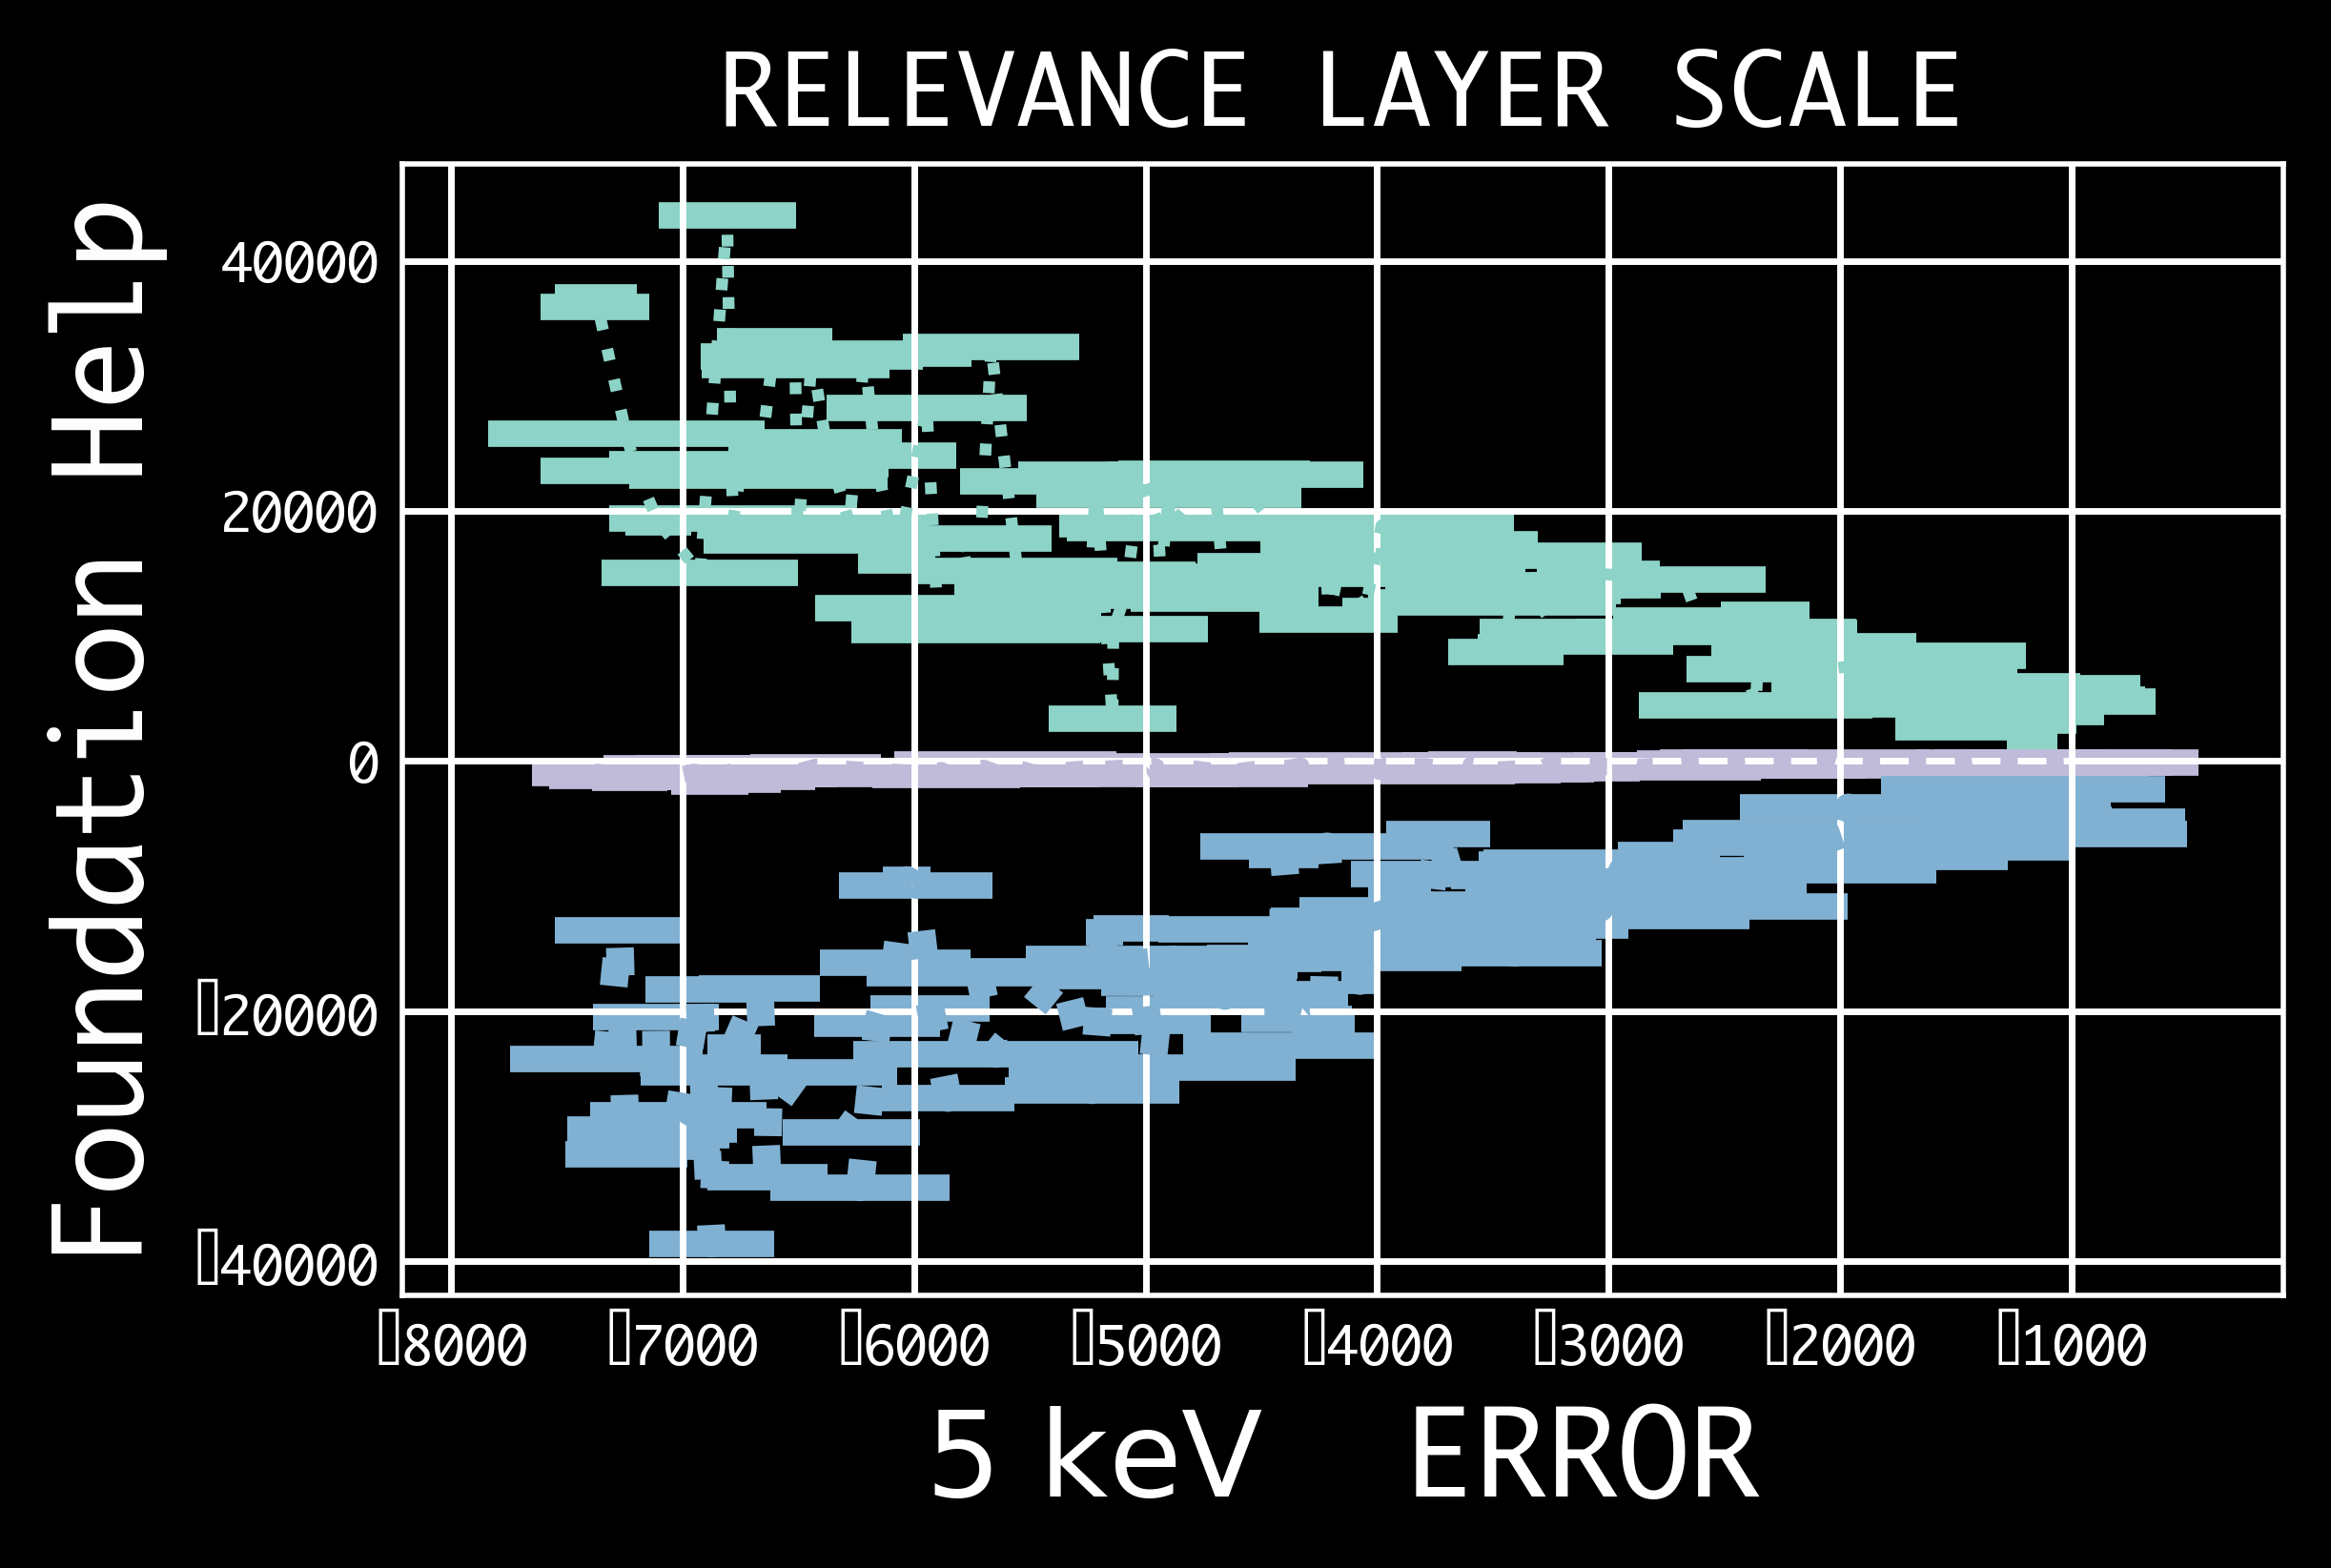

In [193]:
fig